# Neural Networks in Lithology Identification: Deep Learning in Oil and Gas Industry
by


Saud Qadir Khan

2019-MS-PET-3

Copyright © 2021 All Rights Reserved

<h2>Table of Content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#dataset">About the Data</a></li>
    <li><a href="#libraries">Libraries</a></li>
    <li><a href="#eda">Exploratory Data Analysis EDA</a></li>
    <li><a href="#ann">ANN Modeling</a></li>
    <li><a href="#hypertuning">Parameter and Hyperparameter Tuning</a></li>
    <li><a href="#results">Results and Discussion</a></li>
</ol>
    
Dated: <strong>03/04/2021</strong>
</div>
 
<hr>

<h2 id="dataset">About the Data</h2>


The dataset contains well logs and lithology of 90 wells from offshore Norway
The data dictionary is given as below
![Data Dictionary](fig/data_dict.jpg "Title")
as well as the interpretation

* LITHOFACIES_LITHOLOGY: lithology class label
* LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

<h2 id="libraries">Libraries</h2>

Let's import the libraries

In [65]:
import pandas as pd        # loading the dataframe
print('pandas: {}'.format(pd.__version__))

import numpy as np        # deals with array
print('numpy: {}'.format(np.__version__))

import random        # generate random numbers
import tensorflow as tf        # loading the dataframe
from tensorflow.keras.utils import plot_model, to_categorical        #convert categorical label
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
print('tensorflow: {}'.format(tf.__version__))
import tensorboard
print('tensorboard: {}'.format(tensorboard.__version__))
import kerastuner as kt
print('kerastuner: {}'.format(kt.__version__))
import sklearn        # machine learning library
from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelBinarizer        #ecnoding and normalizing modules
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
print('sklearn: {}'.format(sklearn.__version__))

import imblearn
from imblearn.over_sampling import SMOTE                #imbalance data
print('imblearn: {}'.format(imblearn.__version__))

import warnings

import pickle
import itertools
import matplotlib        # plotting library
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
print('matplotlib: {}'.format(matplotlib.__version__))

import seaborn as sns        #plotting library
print('seaborn: {}'.format(sns.__version__))
import pydot
print('pydot: {}'.format(pydot.__version__))
import missingno
print('missingno: {}'.format(missingno.__version__))

warnings.filterwarnings("ignore")
%reload_ext tensorboard
%matplotlib inline

pandas: 1.2.3
numpy: 1.19.5
tensorflow: 2.4.1
tensorboard: 2.4.1
kerastuner: 1.0.2
sklearn: 0.24.1
imblearn: 0.8.0
matplotlib: 3.3.4
seaborn: 0.11.1
pydot: 1.4.2
missingno: 0.4.2


<h2 id="#eda">Exploratory Data Analysis EDA</h2>

In this section, dataset will be explored from different aspects. Every column of the data will be discussed and analyzed. Duplicate and missing values will be dealt and log curves will be plotted against depth and type of lithology. Let's get started and load the dataset.
pandas module `read_csv` is used to load the csv file. As the first row contains the column names, `header = 0` used. each column data was separted by `;` and data was loaded in a variable named `dataset`. Let's have a look on first 5 rows of the dataset. As total columns were 29, Transponse of the visual representation of header was taken to get fit data on the screen.

In [66]:
dataset = pd.read_csv("data/train.csv", delimiter =';', header = 0)
dataset.head().T

,0,1,2,3,4
WELL,15/9-13,15/9-13,15/9-13,15/9-13,15/9-13
DEPTH_MD,494.528,494.68,494.832,494.984,495.136
X_LOC,437641.96875,437641.96875,437641.96875,437641.96875,437641.96875
Y_LOC,6470972.5,6470972.5,6470972.5,6470972.5,6470972.5
Z_LOC,-469.501831,-469.653809,-469.805786,-469.957794,-470.109772
GROUP,NORDLAND GP.,NORDLAND GP.,NORDLAND GP.,NORDLAND GP.,NORDLAND GP.
FORMATION,NaN,NaN,NaN,NaN,NaN
CALI,19.480835,19.4688,19.4688,19.459282,19.4531
RSHA,NaN,NaN,NaN,NaN,NaN
RMED,1.61141,1.61807,1.626459,1.621594,1.602679


It can be seen from the header, the few columns such as `WELL`,`GROUP` are text ( string) while other contain numeric values. NaN string is also there. NaN(not a number) represents null values. Lets explore the non null values and data type of each column. Before that, create a copy of the dataset, so that any changes may not be stored in the `dataset` variable

In [67]:
df = dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

Only well name, measure depth and lithology columns are completely available. While other columns contains null values. Before exploring the null values, let's check the duplicate samples

In [68]:
# check the duplicate values
sum(df.duplicated())

0

No duplicate found every row is unique in nature but there is missing values, we will explore missing data in this section using missingo library

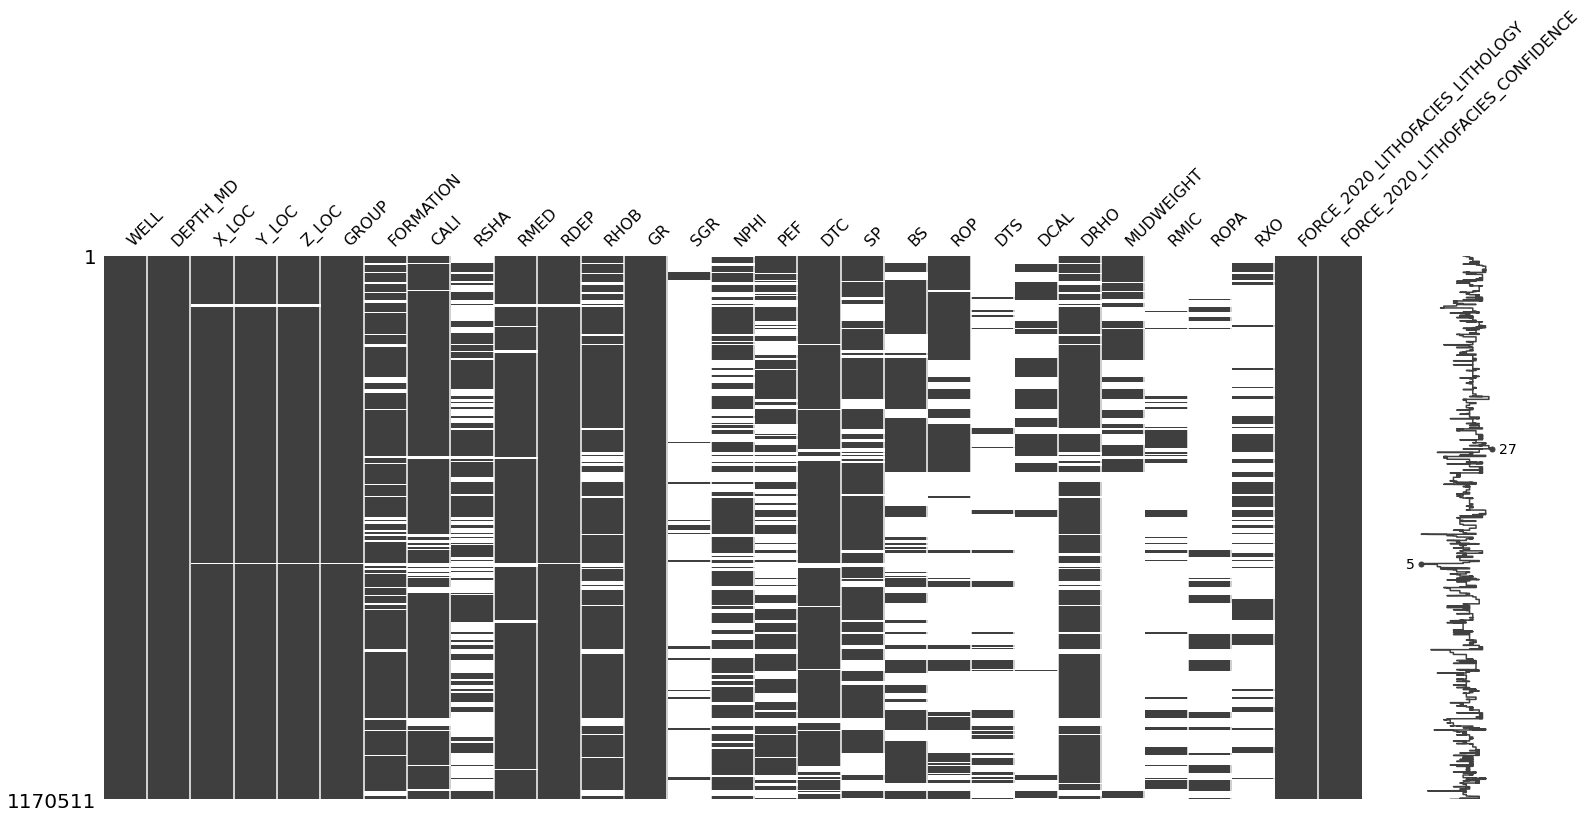

In [69]:
missingno.matrix(df);

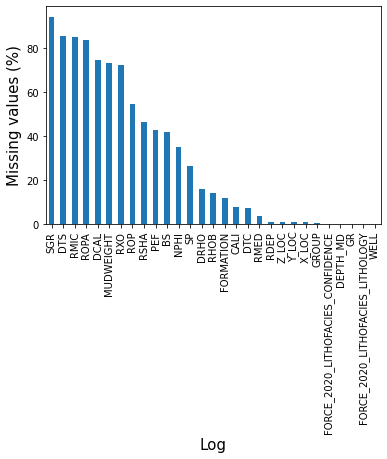

In [70]:
percent_missing = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
percent_missing.plot.bar()
plt.xlabel('Log')
plt.ylabel("Missing values (%)");

Now all wells will be plotted according to their coordinates

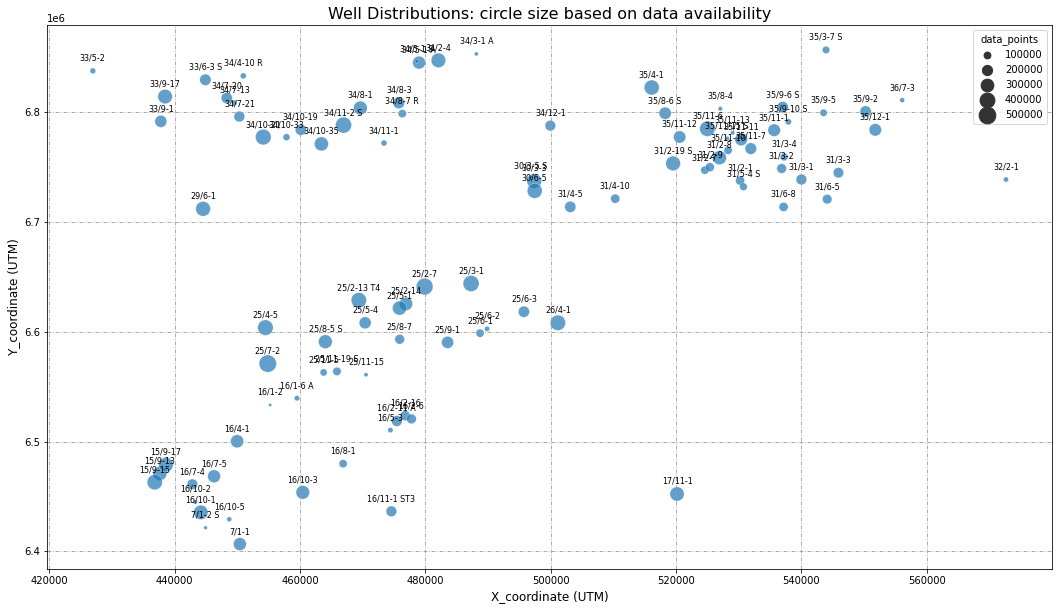

In [71]:
well_names_uniq = df.WELL.unique()
X_cor = df.groupby(['WELL'])['X_LOC'].mean()
Y_cor = df.groupby(['WELL'])['Y_LOC'].mean()
data_count = df.groupby(['WELL']).count().sum(axis='columns')
loc_wells_df = pd.DataFrame({'WELL':well_names_uniq, 'X_LOC': X_cor, 'Y_LOC': Y_cor, 'data_points': data_count})
ind = loc_wells_df.index


fig, ax = plt.subplots(figsize=(18,10))

sns.scatterplot(data=loc_wells_df, x=X_cor, y=Y_cor,size='data_points', alpha=.7,
                 palette=['red', 'blue', 'green'],sizes=(10, 300), ax=ax)

ax.set_title('Well Distributions: circle size based on data availability', fontsize = '16')
ax.set_xlabel('X_coordinate (UTM)', fontsize = '12')
ax.set_ylabel('Y_coordinate (UTM)', fontsize = '12')

for x,y,z in zip(X_cor,Y_cor,ind):

    label_s = "{}".format(z)

    ax.annotate(label_s, (x,y),  textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize = '8') 

ax.grid(True, color='0.6',axis='both', dashes=(5,2,1,2))
#plt.savefig('well_map.png', dpi=300)

Different group of clusters can be observered and in the same cluster wells can be treated as nearby wells. In upcoming section Machine learning algorithem k-mean++ clustring will be applied to make the cluster from the coordinates

In [72]:
loc_wells_df.reset_index(drop = True)

,WELL,X_LOC,Y_LOC,data_points
0,15/9-13,437627.322429,6.470979e+06,359122
1,15/9-15,436809.066756,6.463002e+06,417669
2,15/9-17,438595.049195,6.478958e+06,382517
3,16/1-2,455221.343750,6.533322e+06,36231
4,16/1-6 A,459499.134117,6.539492e+06,68364
...,...,...,...,...
93,35/9-5,543528.448705,6.799380e+06,108646
94,35/9-6 S,537006.585411,6.804528e+06,237410
95,36/7-3,556078.064017,6.810860e+06,60977
96,7/1-1,450389.453994,6.406644e+06,303415


Before implemneting K mean clustring, Data needed to be transformed into standard scaler or any other transformation



In [73]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
X = loc_wells_df.drop(['WELL','data_points'], axis =1).values

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:3]

array([[-1.4087199 , -1.59042656],
       [-1.43127095, -1.65052945],
       [-1.38204945, -1.53030764]])

Applied elbow method to find optimal value of k for k mean clustring

In [74]:
Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(init = "k-means++", n_clusters = k)
    km = km.fit(Clus_dataSet)
    Sum_of_squared_distances.append(km.inertia_)

Plotting of each k value against error or sum of squared distance which is calculated from .intertia_ method


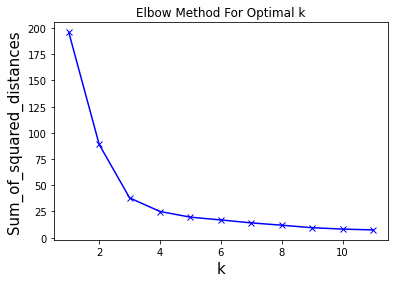

In [75]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It can be seen that k = 4 is the optimum value and after k = 4 the rate of decrease in sum of squared disctance is very small

In [76]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
loc_wells_df["cluster"] = labels
loc_wells_df.head(5)

,WELL,X_LOC,Y_LOC,data_points,cluster
WELL,,,,,
15/9-13,15/9-13,437627.322429,6.470979e+06,359122,0
15/9-15,15/9-15,436809.066756,6.463002e+06,417669,0
15/9-17,15/9-17,438595.049195,6.478958e+06,382517,0
16/1-2,16/1-2,455221.343750,6.533322e+06,36231,0
16/1-6 A,16/1-6 A,459499.134117,6.539492e+06,68364,3


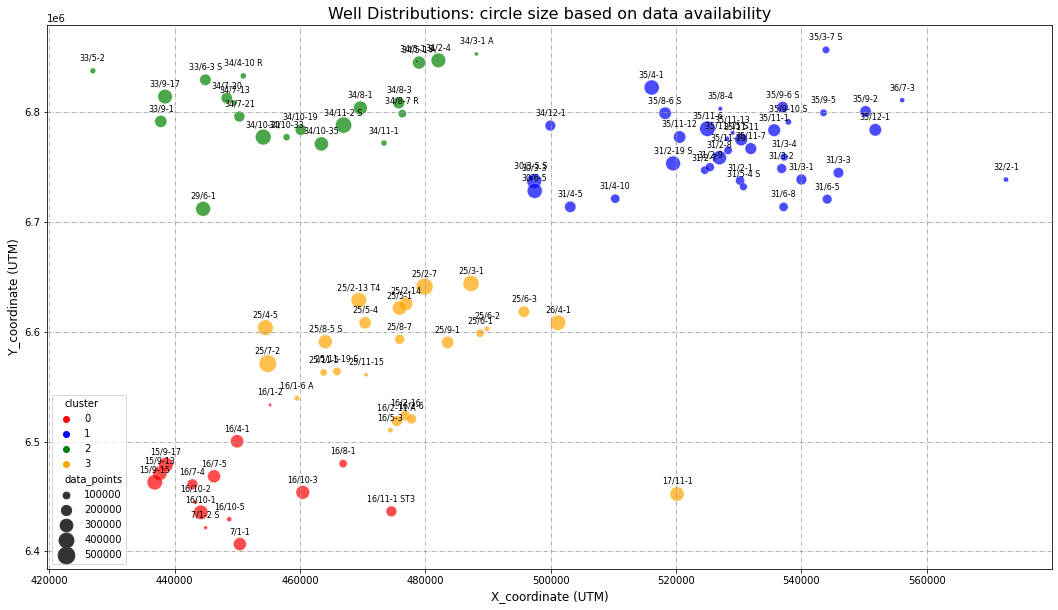

In [77]:
fig, ax = plt.subplots(figsize=(18,10))

sns.scatterplot(data=loc_wells_df, x=X_cor, y=Y_cor,size='data_points',hue ='cluster', alpha=.7,
                 palette=['red', 'blue', 'green','orange'],sizes=(10, 300), ax=ax)

ax.set_title('Well Distributions: circle size based on data availability', fontsize = '16')
ax.set_xlabel('X_coordinate (UTM)', fontsize = '12')
ax.set_ylabel('Y_coordinate (UTM)', fontsize = '12')

for x,y,z in zip(X_cor,Y_cor,ind):

    label_s = "{}".format(z)

    ax.annotate(label_s, (x,y),  textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize = '8') 

ax.grid(True, color='0.6',axis='both', dashes=(5,2,1,2))
#plt.savefig('well_map.png', dpi=300)

4 different clusters has been created by k-mean++ algorithem can bee seen in above figure. Before we start preparing data set for neural networks. let's work on visualization part. For our target variable which is Lithology, `lithology_key` is defined as given below. and then `lithology_kabel`, `lithology_number` and `lithology_color` were extracted and in the end lithology column was mapped against lithology number

In [78]:
lithology_key = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

lithology_label = {}
lithology_number = {}
lithology_num = {}
lithology_color = {}

for key, value in lithology_key.items():
    lithology_label[key] =lithology_key[key]['lith']
    lithology_number[key] =lithology_key[key]['lith_num']
    lithology_num[lithology_key[key]['lith']] = lithology_key[key]['lith_num']
    lithology_color[key] = lithology_key[key]['color']

rev_lith_num = dict([(key,value) for value, key in lithology_number.items()])

df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_number).astype('category')

For each lithology, used assigned hatch and color to viusalize the color coding

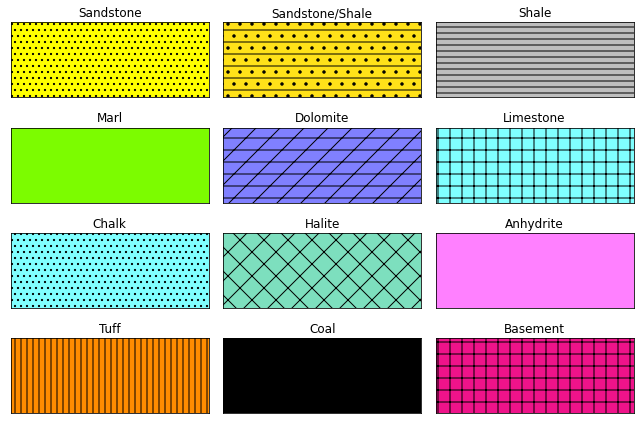

In [79]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=3,nrows=4, sharex=True, sharey=True,
                         figsize=(9,6), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_key.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_key[key]['color'], hatch=lithology_key[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_key[key]['lith']))

plt.tight_layout()

plt.show()

8 tracks were created
1.  Depth
2.  Caliper Log and Bit Size
3.  Gamma Ray and Spontenoeus Potential Log
4.  Shallow, Medium and Deep Resistivity
5.  Bulk Density and Neutron Porosity
6.  Sonic Log and Photoelectic Effect Log
7.  Drilling ROP and Mudweight
8.  Lithology

In [80]:
def log_plot(well_x, top_depth = False, bottom_depth = False, save_img = False):
    if not top_depth:
        top_depth = well_x.iloc[:,1].min()
    if not bottom_depth:
        bottom_depth = well_x.iloc[:,1].max()
        
    fig = plt.figure(figsize=(18,10))
    gs1 = GridSpec(1, 8, left=0.05, right=0.95, hspace=0.05,wspace=0.12, 
                   width_ratios=[.3,.6, 1.1 ,1.1, 1.1, 1.1, .7, .8])
    
    ax0   = fig.add_subplot(gs1[0,0])
    ax1   = fig.add_subplot(gs1[0,1], sharey=ax0)
    ax2   = ax1.twiny()
    ax3   = fig.add_subplot(gs1[0,2], sharey=ax0)
    ax4   = ax3.twiny()
    ax5   = fig.add_subplot(gs1[0,3],sharey=ax0)
    ax6   = ax5.twiny()
    ax7   = ax5.twiny()
    ax8   = fig.add_subplot(gs1[0,4],sharey=ax0)
    ax9   = ax8.twiny()
    ax10  = fig.add_subplot(gs1[0,5],sharey=ax0)
    ax11  = ax10.twiny()
    ax12  = ax11.twiny()
    ax13  = fig.add_subplot(gs1[0,6],sharey=ax0)
    ax14  = ax13.twiny()
    ax15  = fig.add_subplot(gs1[0,7],sharey=ax0)
    
    ax_list = [ ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]
    track_list = [ ax1,ax3, ax5, ax8,  ax10,  ax13 ]
    
    for ax in ax_list:
        plt.setp(ax.get_yticklabels(), visible = False)

    ######################################################################## track0: depth
    ax0.plot(np.zeros(len(well_x['DEPTH_MD'])), well_x['DEPTH_MD'], color='k', alpha=.1, lw=1, ls= '-')
    ax0.tick_params(axis="y",direction="in", pad=-38)
    ax0.set_xlabel('MD(m)', fontsize = '12' )
    ax0.xaxis.set_label_position("top")
    ax0.set_xticklabels('')
    ax0.tick_params(axis='y', colors="lightyellow", labelsize=13 )
    ax0.set_facecolor('k')
    ax0.set_xticks([0, 1])

    ######################################################################## track1: Caliper/BS    
    ax1.plot(well_x['CALI'], well_x['DEPTH_MD'], color='r', alpha=.8, lw=0.5, ls= '-')
    ax1.set_xlabel("Caliper")
    ax1.xaxis.label.set_color("r")
    ax1.set_xlim(0, 30)
    ax1.tick_params(axis='x', colors="r")
    ax1.spines["top"].set_edgecolor("r")
    ax1.spines["top"].set_position(("axes", 1.0))
    ax1.title.set_color('r')
    ax1.fill_betweenx(well_x['DEPTH_MD'], well_x['BS'], well_x['CALI'], where=well_x['BS'] <= well_x['CALI'], 
                      facecolor='r',alpha=.5)
    ax1.set_xticks([0,10,20, 30])
    
    ax2.plot(well_x['BS'], well_x['DEPTH_MD'], color='b', alpha=.8, lw=1, ls= '-')
    ax2.set_xlabel("Bit Size")
    ax2.xaxis.label.set_color("b")
    ax2.set_xlim(0, 30)
    ax2.tick_params(axis='x', colors="b")
    ax2.spines["top"].set_edgecolor("b")
    ax2.spines["top"].set_position(("axes", 1.08))
    ax2.title.set_color('b')
    ax2.set_xticks([0,10,20,30])
    
    ############################################################################ track2: GR/SP  
    ax3.plot(well_x['GR'], well_x['DEPTH_MD'], color='g', alpha=.6, lw=0.4, ls= '-')
    ax3.set_xlabel("Gamma Ray")
    ax3.fill_betweenx(well_x['DEPTH_MD'], well_x['GR'],0,facecolor='g',alpha=.4)
    ax3.xaxis.label.set_color("g")
    ax3.set_xlim(0, 250)
    ax3.tick_params(axis='x', colors="g")
    ax3.spines["top"].set_edgecolor("g")
    ax3.spines["top"].set_position(("axes", 1.0))
    ax3.title.set_color('r')
    ax3.set_xticks([0, 50, 100, 150, 200, 250])

    ax4.plot(well_x['SP'], well_x['DEPTH_MD'], color='m', alpha=.5, lw=0.4, ls= '-')
    ax4.set_xlabel("SP")
    ax4.xaxis.label.set_color("m")
    ax4.set_xlim(0, 200)
    ax4.tick_params(axis='x', colors="m")
    ax4.spines["top"].set_edgecolor("m")
    ax4.spines["top"].set_position(("axes", 1.08))
    ax4.title.set_color('m')
    ax4.set_xticks([0, 50, 100, 150, 200])

    ############################################################################ track3: Resistivity 
    ax5.plot(well_x['RDEP'], well_x['DEPTH_MD'], color='k', alpha=.8, lw=0.4, ls= '-')
    ax5.set_xlabel("Deep Res.")
    ax5.xaxis.label.set_color("k")
    ax5.tick_params(axis='x', colors="k")
    ax5.spines["top"].set_edgecolor("k")
    ax5.spines["top"].set_position(("axes", 1.0))
    ax5.title.set_color('r')
      
    ax6.plot(well_x['RMED'], well_x['DEPTH_MD'], color='r', alpha=.8, lw=0.4, ls= '-')
    ax6.set_xlabel("Medium Res.")
    ax6.xaxis.label.set_color("r")
    ax6.tick_params(axis='x', colors="r")
    ax6.spines["top"].set_edgecolor("r")
    ax6.spines["top"].set_position(("axes", 1.08))
    ax6.title.set_color('r')

    ax7.plot(well_x['RSHA'], well_x['DEPTH_MD'], color='b', alpha=.5, lw=0.4, ls= '-')
    ax7.set_xlabel("Shallow Res.")
    ax7.xaxis.label.set_color("b")
    ax7.tick_params(axis='x', colors="b")
    ax7.spines["top"].set_edgecolor("b")
    ax7.spines["top"].set_position(("axes", 1.16))
    ax7.title.set_color('r')
   
    ############################################################################ track4: Neutron-Density 
    ax8.plot(well_x['RHOB'], well_x['DEPTH_MD'], color='r', alpha=.5, lw=0.4, ls= '-')
    ax8.set_xlabel("RHOB")
    ax8.xaxis.label.set_color("r")
    ax8.tick_params(axis='x', colors="r")
    ax8.spines["top"].set_edgecolor("r")
    ax8.spines["top"].set_position(("axes", 1.0))
    ax8.title.set_color('r')
    ax8.set_xlim(1.65, 2.95)
    ax8.set_xticks([1.65, 2,  2.4,   2.8])
    
    ax9.plot(well_x['NPHI'], well_x['DEPTH_MD'], color='b', alpha=.5, lw=0.4, ls= '-')
    ax9.set_xlabel("NPHI")
    ax9.xaxis.label.set_color("b")
    ax9.tick_params(axis='x', colors="b")
    ax9.spines["top"].set_edgecolor("b")
    ax9.spines["top"].set_position(("axes", 1.08))
    ax9.title.set_color('r')
    ax9.set_xlim(.61, -.15)
    ax9.set_xticks([.6, .40, .2,  0, -.2])
    
    ############################################################################ track5: Sonic/PEF
    ax10.plot(well_x['DTC'], well_x['DEPTH_MD'], color='k', alpha=.8, lw=0.4, ls= '-')
    ax10.set_xlabel("DTC")
    ax10.xaxis.label.set_color("k")
    ax10.tick_params(axis='x', colors="k")
    ax10.spines["top"].set_edgecolor("k")
    ax10.spines["top"].set_position(("axes", 1.0))
    ax10.title.set_color('k')
    ax10.set_xlim(250, 30)
    
    ax11.plot(well_x['DTS'], well_x['DEPTH_MD'], color='b', alpha=.5, lw=0.4, ls= '-')
    ax11.set_xlabel("DTS")
    ax11.xaxis.label.set_color("b")
    ax11.tick_params(axis='x', colors="b")
    ax11.spines["top"].set_edgecolor("b")
    ax11.spines["top"].set_position(("axes", 1.08))
    ax11.title.set_color('b')
    ax11.set_xlim(450, 60)
    
    ax12.plot(well_x['PEF'], well_x['DEPTH_MD'], color='m', alpha=.5, lw=0.4, ls= '-')
    ax12.set_xlabel("PEF")
    ax12.xaxis.label.set_color("m")
    ax12.tick_params(axis='x', colors="m")
    ax12.spines["top"].set_edgecolor("m")
    ax12.spines["top"].set_position(("axes", 1.16))
    ax12.title.set_color('m')
    ax12.set_xlim(-1, 60)
    ax12.set_xticks([1,  10])
    
    ############################################################################ track6: Drilling
    ax13.plot(well_x['ROP'], well_x['DEPTH_MD'], color='r', alpha=.8, lw=0.4, ls= '-')
    ax13.set_xlabel("ROP")
    ax13.xaxis.label.set_color("r")
    ax13.tick_params(axis='x', colors="r")
    ax13.spines["top"].set_edgecolor("r")
    ax13.spines["top"].set_position(("axes", 1.0))
    ax13.title.set_color('r')
    ax13.set_xlim(-10, 100)
    ax13.set_xticks([-10,  200])

    ax14.plot(well_x['MUDWEIGHT'], well_x['DEPTH_MD'], color='b', alpha=.9, lw=0.8, ls= '-')
    ax14.set_xlabel("Mud Weight")
    ax14.xaxis.label.set_color("b")
    ax14.tick_params(axis='x', colors="b")
    ax14.spines["top"].set_edgecolor("b")
    ax14.spines["top"].set_position(("axes", 1.08))
    ax14.title.set_color('r')

    ############################################################################ track7: Lithology
    ax15.plot(well_x["FORCE_2020_LITHOFACIES_LITHOLOGY"], well_x['DEPTH_MD'], color = "black", linewidth = 0.5)
    ax15.set_xlabel("Lithology",fontsize = '12' )
    ax15.set_xlim(0, 1)
    ax15.xaxis.label.set_color("black")
    ax15.tick_params(axis='x', colors="black")
    ax15.spines["top"].set_edgecolor("black")
    ax15.set_xticks([0, 1]) 

    for key in lithology_key.keys():
        color = lithology_key[key]['color']
        hatch = lithology_key[key]['hatch']
        ax15.fill_betweenx(well_x['DEPTH_MD'], 0, well_x['FORCE_2020_LITHOFACIES_LITHOLOGY'], where=(well_x['FORCE_2020_LITHOFACIES_LITHOLOGY']==key),
                         facecolor=color, hatch=hatch)
    

    ################################################################### Repeatition avoid
    for ax in ax_list:
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top") 
        ax.set_ylim(bottom_depth, top_depth*.99)              
    
    for ax in track_list:
        ax.grid(True, color='0.8', dashes=(5,2,1,2))
        ax.set_facecolor('#ffffff')
        
    fig.suptitle('Well: %s'%well_x.iloc[0]['WELL'], fontsize=18, y=1.08, x=.48)

    if save_img == True:
        plt.savefig('lithplot.png', dpi=400, bbox_inches='tight')

In [81]:
def cross_plots(well_x, start_depth, stop_depth):
    
    # these are line position of dolomite, sandstone and limestone rocks for NPHI-Density standard template
    sand_temp = np.array([[-0.021, 2.650],[-0.012, 2.633],[0.005, 2.594],[0.017, 2.570],[0.042, 2.520],
    [0.060, 2.482],[0.105, 2.403],[0.153, 2.322],[0.202, 2.238],[0.251, 2.155],[0.303, 2.076],
    [0.353, 1.994],[0.407, 1.909]])

    lime_temp = np.array([[0.000, 2.71],[0.027, 2.67],[0.052,2.62],[0.100,2.54],[0.149,2.45],[0.199,2.37],
    [0.251,2.28],[0.298,2.20],[0.349,2.11],[0.398,2.03],[0.445,1.95]])

    dolo_temp = np.array ([[0.023,2.870],[0.039,2.865],[0.052,2.855],[0.063,2.846],[0.085,2.822],[0.119,2.778],[0.179,2.683],[0.205,2.635],
    [0.228,2.590],[0.251,2.546],[0.272,2.497],[0.316,2.403],[0.333,2.363],[0.354,2.313],[0.378,2.253],[0.392,2.217],
    [0.420,2.147],[0.445,2.074]])

    fig = plt.figure(figsize=(12,12))
    gs1 = GridSpec(2, 2, left=0.05, right=0.95, hspace=0.2,wspace=0.2)
    
    ax1   = fig.add_subplot(gs1[0])
    ax2   = ax1.twiny()
    ax3   = ax1.twiny()
    ax4   = ax1.twiny()
        
    ax5   = fig.add_subplot(gs1[1])
    ax6   = fig.add_subplot(gs1[2])
    ax7   = fig.add_subplot(gs1[3])
     
    ########################################################################  
    well_x = well_x.loc[(well_x['DEPTH_MD'] >= start_depth) & (well_x['DEPTH_MD'] <= stop_depth)]
    
    sns.scatterplot(data=well_x, x=well_x['NPHI'], y=well_x['RHOB'], palette=lithology_color.values(), 
                    hue = well_x['lithology_name'] , alpha=.9, ax=ax1)
    ax1.set_xlim(-0.15,1)
    ax1.set_ylim(3,1)
    ax1.text(-.08, 2.98, 'Dolomite',  rotation=40, fontsize = '7')
    ax1.text(-.10, 2.88, 'Limestone',  rotation=40, fontsize = '7')
    ax1.text(-.10, 2.75, 'Sandstone',  rotation=40, fontsize = '7')

    ax2.plot(sand_temp[0:, 0], sand_temp[0:, 1], color='k', alpha=.9, lw=1, ls= '-')
    ax2.set_xlim(-0.15,1)
    ax2.set_ylim(3,1)
    ax2.set_xticklabels('')
    
    ax3.plot(lime_temp[0:, 0], lime_temp[0:, 1],color='k', alpha=.9, lw=1, ls= '-')
    ax3.set_xlim(-0.15,1)
    ax3.set_ylim(3,1)
    ax3.set_xticklabels('')
    
    ax4.plot(dolo_temp[0:, 0], dolo_temp[0:, 1],color='k', alpha=.9, lw=1, ls= '-')
    ax4.set_xlim(-0.15,1)
    ax4.set_ylim(3,1)
    ax4.set_xticklabels('')
    ########################################################################  
    sns.scatterplot(data=well_x, x=well_x['NPHI'], y=well_x['DTC'], palette=lithology_color.values(), 
                    hue = well_x['lithology_name'] , alpha=.9, ax=ax5)
    ax5.set_xlim(-0.15,1)
    ax5.set_ylim(0,200)
    ########################################################################  
    sns.scatterplot(data=well_x, x=well_x['GR'], y=well_x['RHOB'], palette=lithology_color.values(), 
                    hue = well_x['lithology_name'] , alpha=.9, ax=ax6)
    ax6.set_xlim(0,150)
    ax6.set_ylim(3,1)
    ########################################################################      
    sns.scatterplot(data=well_x, x=well_x['NPHI'], y=well_x['GR'], palette=lithology_color.values(), 
                    hue = well_x['lithology_name'] , alpha=.9, ax=ax7)
    ax7.set_xlim(-0.15,1)
    ax7.set_ylim(0,150)
    
    for ax in [ax1, ax5,ax6,ax7]:
        ax.grid(True, color='0.75', dashes=(5,2,1,2))
        ax.set_title('Well: %s'%well_x.iloc[0]['WELL'])
    plt.savefig('Fig3_cross_plot.png', dpi=300, bbox_inches='tight')

In [82]:
def predict_plot(plot_data, top_depth= False, bottom_depth = False, save_img=False):
    if not top_depth:
        top_depth = plot_data.iloc[:,0].min()
    if not bottom_depth:
        bottom_depth = plot_data.iloc[:,0].max()
    columns = plot_data.columns
    n = len(columns)
    fig = plt.figure(figsize=(n*1.5,10))
    gs1 = GridSpec(1, n, left=0.05, right=0.95, hspace=0.05,wspace=0.5)

    for i, col in zip(range(n), columns):
        if i==0:
            ax0   = fig.add_subplot(gs1[0,i])
            ax0.plot(np.zeros(len(plot_data[col])), plot_data[col], color='r', alpha=.1, lw=1, ls= '-')
            ax0.tick_params(axis="y",direction="in", pad=-38)
            ax0.set_xlabel(str(col), fontsize = '12' )
            ax0.xaxis.set_label_position("top")
            ax0.set_xticklabels('')
            ax0.tick_params(axis='y', colors="lightyellow", labelsize=13 )
            ax0.set_facecolor('g')
            ax0.set_xticks([0, 1])  

            continue
        
        ax1   = fig.add_subplot(gs1[0,i], sharey=ax0)
        ax1.plot(plot_data.iloc[:,i], plot_data.iloc[:,0], color = "black", linewidth = 0.5)
        ax1.set_xlabel(str(col),fontsize = '12' )
        ax1.set_xlim(0, 1)
        ax1.xaxis.label.set_color("black")
        ax1.tick_params(axis='x', colors="black")
        ax1.spines["top"].set_edgecolor("black")
        ax1.set_xticks([0, 1])

        ax1.xaxis.set_ticks_position("top")
        ax1.xaxis.set_label_position("top") 
        ax1.set_ylim(bottom_depth*1.01, top_depth*.99)
        for key in lithology_key.keys():
            color = lithology_key[key]['color']
            hatch = lithology_key[key]['hatch']
            ax1.fill_betweenx(plot_data.iloc[:,0], 0, plot_data.iloc[:,i],
                              where=(plot_data.iloc[:,i]==key),facecolor=color, hatch=hatch)
    
       
#     plt.show()

    if save_img == True:
        plt.savefig('predict_plot.png', dpi=400, bbox_inches='tight')

<h2 id="ann">ANN Modeling</h2>

### Data Preprocessing
Firstly dataset will be splitted into training, validation and testing set. For this purpose function named `split` is defined. which takes input dataset, number of training, validation and testing wells, cluster number to choose data from or data can be choosen from the initials of name of the well for example *starting_with 25*. Randomness of the dataset choosen can be assigned from *random_state*. After selecting the train_well, val_wells and test_well, the respective rows were filtered from dataset. For model training, `'DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR','NPHI', 'PEF','DTC', 'SP' and 'DRHO'` and missing values were filled with 0. `FORCE_2020_LITHOFACIES_LITHOLOGY` was used as target variable. Further the `input_prep` is used to normalize the input log curves. For this purpose `StadardScaler` was used from preprocessing module of sklearn library. and target variable lithology was encoded using `LabelEncoder`

In [83]:
def split(data,train,val,test, cluster = 0, start_with='25',show=False,random_state=100):
    random.seed(random_state)
    total_wells = data['WELL'].value_counts().index.tolist()
    wells = loc_wells_df[loc_wells_df.cluster == cluster].index.tolist()          # from cluster
    # wells = [well for well in total_wells if well.startswith(start_with)]         # start with
    total_well =train+val+test
    sampled_wells = wells[:total_well]
    random.shuffle(sampled_wells)
    train_wells = sampled_wells[:train]
    val_wells = sampled_wells[train:train+val]
    test_wells = sampled_wells[-test:]

    if show == True:    
      print("training wells : ",train_wells)
      print("validation wells: ",val_wells)
      print("testing wells : ",test_wells)

    train_data = data[data['WELL'].isin(train_wells)]
    val_data = data[data['WELL'].isin(val_wells)]
    test_data = data[data['WELL'].isin(test_wells)]

    return (train_data, val_data, test_data)


def preprocess(data):
    X_data = data[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP',
                   'RHOB', 'GR','NPHI', 'PEF','DTC', 'SP', 'DRHO']].copy()
    X_data.fillna(0, inplace =True)
    y_data =  np.array(data['FORCE_2020_LITHOFACIES_LITHOLOGY']).reshape(-1, 1)
    return (X_data, y_data)


def input_prep(X_train, X_val, X_test, lstm = False):
    scaler = StandardScaler().fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_val_norm = scaler.transform(X_val)
    X_test_norm = scaler.transform(X_test)
    if lstm:
        X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], 1, X_train_norm.shape[1]))
        X_val_norm = X_val_norm.reshape((X_val_norm.shape[0], 1, X_val_norm.shape[1]))
        X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], 1, X_test_norm.shape[1]))
        
    return scaler, X_train_norm, X_val_norm ,X_test_norm


def target_prep(y_train, y_val, y_test):
    encoder = LabelBinarizer()
    encoder.fit(np.concatenate((y_train,y_val,y_test), axis=0))
    y_train_enc = encoder.transform(y_train)
    y_val_enc = encoder.transform(y_val)
    y_test_enc = encoder.transform(y_test)
    return encoder, y_train_enc, y_val_enc, y_test_enc

To prepare base ANN model, `keras` Sequential API was used, and model architecture was Input-256-128-64-32-Output. for hidden layer `relu` activation function was used while for output layer `softmax` was used. Dropout was set to 0.4 after every hidden layer. To compile the model, optimzer used was `adam` with default learning rate and loss was `categorical_crossentropy` due to multiclass classification nature of our porblem

In [84]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, activation = 'relu', input_dim = X_train_norm.shape[1]))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(y_train_enc.shape[1], activation = 'softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

loss_accuracy function has been defined to plot the accuracy and loss of training and validation data. it will take input of model history and visualize the loo and accuracy against the epoch

In [85]:
def loss_accuracy(history):    
    fig = plt.figure(figsize=(8,5))
    plt.rcParams['axes.labelsize'] = 15
    plt.plot(history.history['loss'],'red',label='Training Loss', linewidth=3.0)
    plt.plot(history.history['val_loss'],'blue',label='Validation Loss',linewidth=3.0)
    plt.xlabel('epochs')
    plt.ylabel('Training loss')
    plt.legend()
    plt.show()

    fig = plt.figure(figsize=(8,5))
    plt.rcParams['axes.labelsize'] = 15
    plt.plot(history.history['accuracy'],'red',label='Training Accuracy',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'blue',label='Validation Accuracy',linewidth=3.0)
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## BASE CASE

In [87]:
train_data, val_data, test_data = split(df,12,3,1, cluster = 1, show =True, random_state = 1)

X_train, y_train = preprocess(train_data)
X_val, y_val = preprocess(val_data)
X_test, y_test = preprocess(test_data)

scaler, X_train_norm, X_val_norm ,X_test_norm = input_prep(X_train, X_val, X_test)
label_encoder, y_train_enc, y_val_enc, y_test_enc = target_prep(y_train, y_val, y_test)

for x in [X_train_norm, y_train_enc, X_val_norm, y_val_enc, X_test_norm, y_test_enc]:
  print(x.shape)

training wells :  ['30/6-5', '31/3-3', '30/3-3', '31/5-4 S', '31/2-8', '31/2-7', '31/2-1', '31/3-1', '31/2-9', '31/3-4', '31/6-5', '30/3-5 S']
validation wells:  ['31/4-10', '31/4-5', '31/3-2']
testing wells :  ['31/2-19 S']
(143832, 12)
(143832, 8)
(32781, 12)
(32781, 8)
(16455, 12)
(16455, 8)


In [88]:
model = get_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3328      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [89]:
history = model.fit(X_train_norm, y_train_enc,
                    validation_data= (X_val_norm,y_val_enc),
                    batch_size=256,
                    epochs=500,
                    steps_per_epoch=10,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)],
                    verbose=2)

Epoch 1/500
10/10 - 2s - loss: 2.1312 - accuracy: 0.1047 - val_loss: 1.9420 - val_accuracy: 0.2353
Epoch 2/500
10/10 - 0s - loss: 1.9538 - accuracy: 0.2145 - val_loss: 1.7645 - val_accuracy: 0.7083
Epoch 3/500
10/10 - 0s - loss: 1.7878 - accuracy: 0.3383 - val_loss: 1.5324 - val_accuracy: 0.6896
Epoch 4/500
10/10 - 0s - loss: 1.6156 - accuracy: 0.4105 - val_loss: 1.4584 - val_accuracy: 0.6896
Epoch 5/500
10/10 - 0s - loss: 1.5255 - accuracy: 0.4914 - val_loss: 1.4755 - val_accuracy: 0.6896
Epoch 6/500
10/10 - 0s - loss: 1.3812 - accuracy: 0.5375 - val_loss: 1.4605 - val_accuracy: 0.7227
Epoch 7/500
10/10 - 0s - loss: 1.3350 - accuracy: 0.5820 - val_loss: 1.4715 - val_accuracy: 0.7296
Epoch 8/500
10/10 - 0s - loss: 1.2452 - accuracy: 0.6121 - val_loss: 1.4636 - val_accuracy: 0.7429
Epoch 9/500
10/10 - 0s - loss: 1.1874 - accuracy: 0.6391 - val_loss: 1.4842 - val_accuracy: 0.7578
Epoch 10/500
10/10 - 0s - loss: 1.1768 - accuracy: 0.6254 - val_loss: 1.5034 - val_accuracy: 0.7593
Epoch 11/

10/10 - 0s - loss: 0.6547 - accuracy: 0.7836 - val_loss: 1.1213 - val_accuracy: 0.7443
Epoch 84/500
10/10 - 0s - loss: 0.6551 - accuracy: 0.7937 - val_loss: 1.0809 - val_accuracy: 0.7459
Epoch 85/500
10/10 - 0s - loss: 0.6894 - accuracy: 0.7758 - val_loss: 1.1065 - val_accuracy: 0.7306
Epoch 86/500
10/10 - 0s - loss: 0.6895 - accuracy: 0.7715 - val_loss: 1.1222 - val_accuracy: 0.7281
Epoch 87/500
10/10 - 0s - loss: 0.6803 - accuracy: 0.7762 - val_loss: 1.0994 - val_accuracy: 0.7242
Epoch 88/500
10/10 - 0s - loss: 0.6361 - accuracy: 0.7887 - val_loss: 1.1239 - val_accuracy: 0.7120
Epoch 89/500
10/10 - 0s - loss: 0.6822 - accuracy: 0.7812 - val_loss: 1.1615 - val_accuracy: 0.6895
Epoch 90/500
10/10 - 0s - loss: 0.6728 - accuracy: 0.7934 - val_loss: 1.1394 - val_accuracy: 0.7029
Epoch 91/500
10/10 - 0s - loss: 0.6684 - accuracy: 0.7980 - val_loss: 1.0727 - val_accuracy: 0.7005
Epoch 92/500
10/10 - 0s - loss: 0.7069 - accuracy: 0.7816 - val_loss: 1.0635 - val_accuracy: 0.7086
Epoch 93/500


Epoch 165/500
10/10 - 0s - loss: 0.5682 - accuracy: 0.8156 - val_loss: 1.2285 - val_accuracy: 0.6697
Epoch 166/500
10/10 - 0s - loss: 0.6071 - accuracy: 0.8094 - val_loss: 1.2076 - val_accuracy: 0.6726
Epoch 167/500
10/10 - 0s - loss: 0.6151 - accuracy: 0.8168 - val_loss: 1.1328 - val_accuracy: 0.7086
Epoch 168/500
10/10 - 0s - loss: 0.5933 - accuracy: 0.8035 - val_loss: 1.1897 - val_accuracy: 0.6828
Epoch 169/500
10/10 - 0s - loss: 0.6059 - accuracy: 0.7960 - val_loss: 1.2069 - val_accuracy: 0.6871
Epoch 170/500
10/10 - 0s - loss: 0.5505 - accuracy: 0.8168 - val_loss: 1.2290 - val_accuracy: 0.6908
Epoch 171/500
10/10 - 0s - loss: 0.5711 - accuracy: 0.8117 - val_loss: 1.2299 - val_accuracy: 0.6880
Epoch 172/500
10/10 - 0s - loss: 0.5787 - accuracy: 0.8129 - val_loss: 1.2256 - val_accuracy: 0.6846
Epoch 173/500
10/10 - 0s - loss: 0.5850 - accuracy: 0.8105 - val_loss: 1.2215 - val_accuracy: 0.6674
Epoch 174/500
10/10 - 0s - loss: 0.6271 - accuracy: 0.8055 - val_loss: 1.2008 - val_accurac

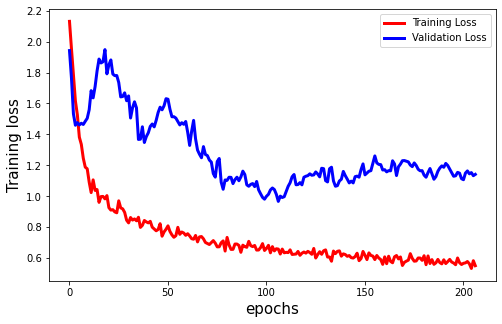

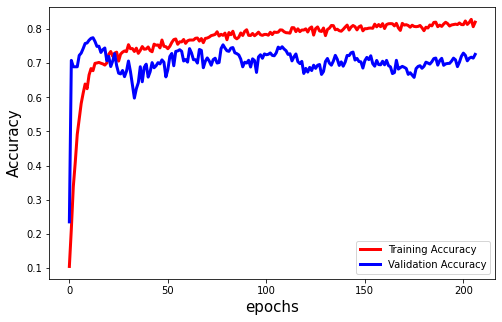

In [90]:
loss_accuracy(history)

In [91]:
print(np.unique(y_test.squeeze()))
y_test.squeeze()

[ 1  2  3  4  6 11]


array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [92]:
y_pred = label_encoder.inverse_transform(model.predict(X_test_norm)).squeeze()
np.unique(y_pred, return_counts= True)

(array([1, 2, 3, 6], dtype=int64),
 array([ 4613,  1045, 10725,    72], dtype=int64))

In [93]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test_norm, y_test_enc)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = model.predict(X_test_norm[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
515/515 [==============================] - 1s 1ms/step - loss: 1.3305 - accuracy: 0.6057
test loss, test acc: [1.3304767608642578, 0.6057125329971313]
Generate predictions for 10 samples
predictions shape: (10, 8)


In [94]:
test_data["actual"] = [rev_lith_num[k] for k in test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"]]
test_data["ann"] = [rev_lith_num[k] for k in y_pred]

predicted_data = test_data[['DEPTH_MD','actual','ann']]
predicted_data.head()

,DEPTH_MD,actual,ann
547668,1537.2784,65000,65000
547669,1537.4304,65000,65000
547670,1537.5824,65000,65000
547671,1537.7344,65000,65000
547672,1537.8864,65000,65000


              precision    recall  f1-score   support

       30000       0.19      0.41      0.26      2183
       65000       0.81      0.75      0.78     11595
       65030       0.35      0.22      0.27      1655
       70000       0.03      0.01      0.01       273
       80000       0.00      0.00      0.00       663
       90000       0.00      0.00      0.00        86

    accuracy                           0.61     16455
   macro avg       0.23      0.23      0.22     16455
weighted avg       0.63      0.61      0.61     16455

Confusion matrix, without normalization
[[ 892  857  434    0    0    0]
 [2824 8705   66    0    0    0]
 [ 478  807  368    2    0    0]
 [ 161   53   57    2    0    0]
 [ 200  275  120   68    0    0]
 [  58   28    0    0    0    0]]


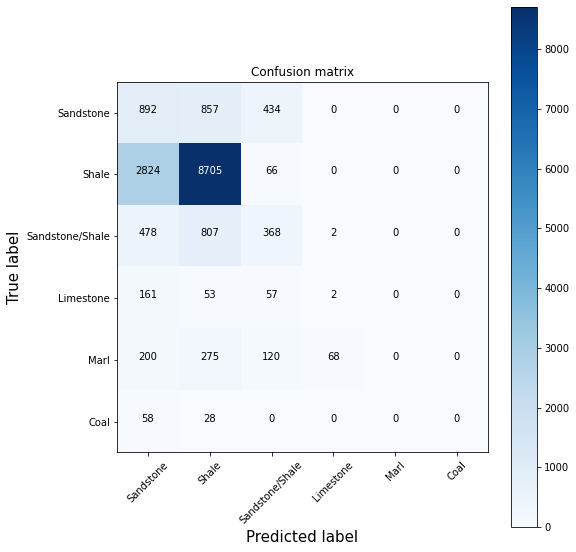

In [95]:
test_list  = predicted_data["actual"].value_counts().index.tolist()
test_list.sort()
test_label= [lithology_label[i] for i in test_list]

cnf_matrix = confusion_matrix(predicted_data["actual"],predicted_data["ann"], labels=test_list)
print (classification_report(predicted_data["actual"],predicted_data["ann"]))

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_label,normalize= False,  title='Confusion matrix')

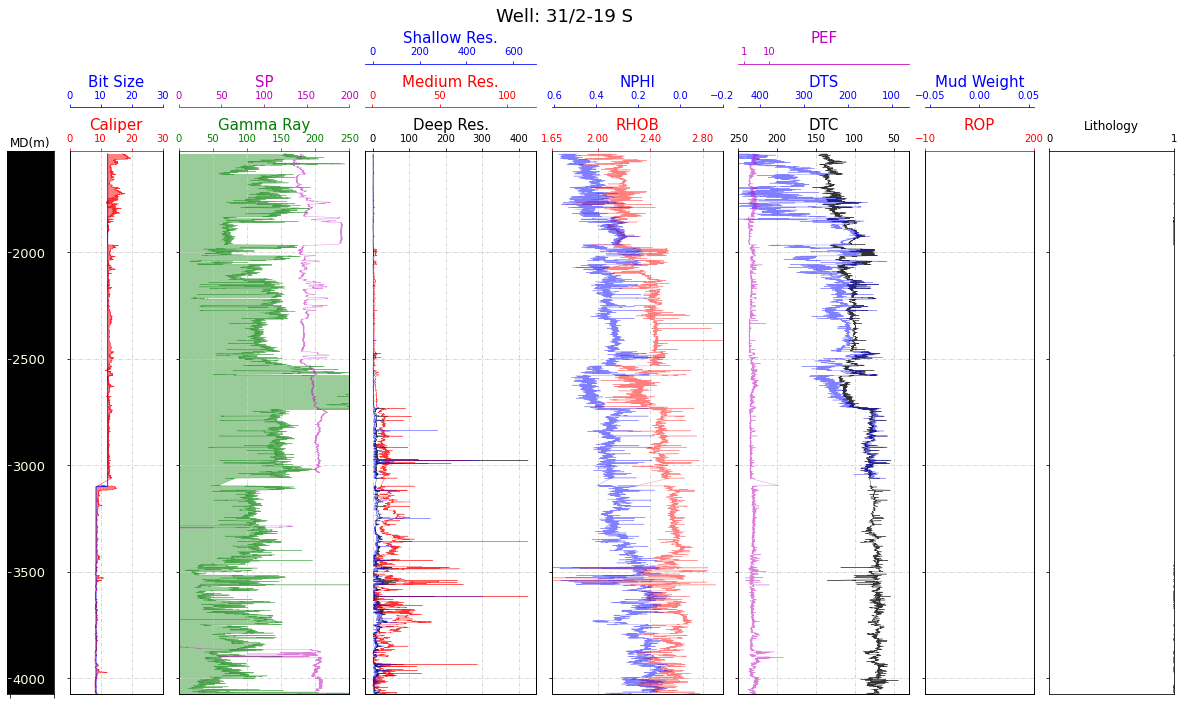

In [96]:
log_plot(test_data)

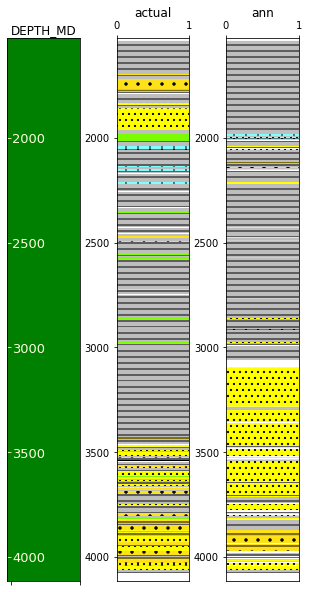

In [97]:
predict_plot(predicted_data)

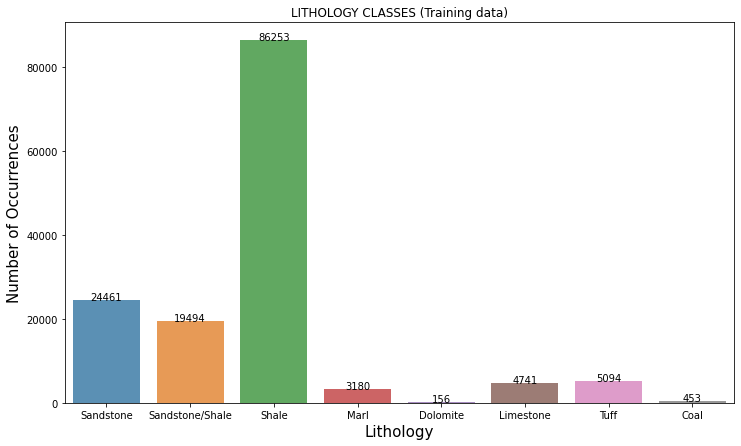

In [98]:
lithology_num_inv = {v: k for k, v in lithology_num.items()}
train_label, train_count = np.unique(y_train, return_counts= True)
train_label = np.array([lithology_num_inv[x] for x in train_label])
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=train_label, y=train_count, alpha=0.8).set(xlabel='Lithology', ylabel='Number of Occurrences',title='LITHOLOGY CLASSES (Training data)')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10, train_count[i],ha="center")
plt.show()

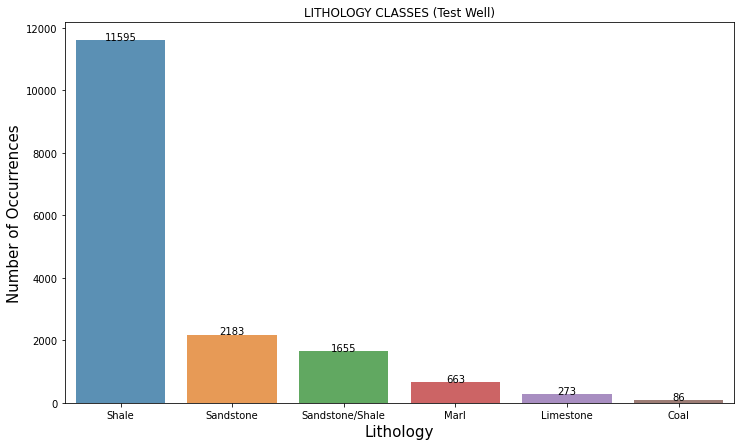

In [99]:
actual = predicted_data['actual'].value_counts()
predicted = predicted_data['ann'].value_counts()
actual_label = [lithology_label[x] for x in actual.index]
predicted_label = [lithology_label[x] for x in predicted.index]

f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=actual_label, y=actual.values, alpha=0.8).set(xlabel='Lithology', ylabel='Number of Occurrences',title='LITHOLOGY CLASSES (Test Well)')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10, actual.values[i],ha="center")
plt.show()

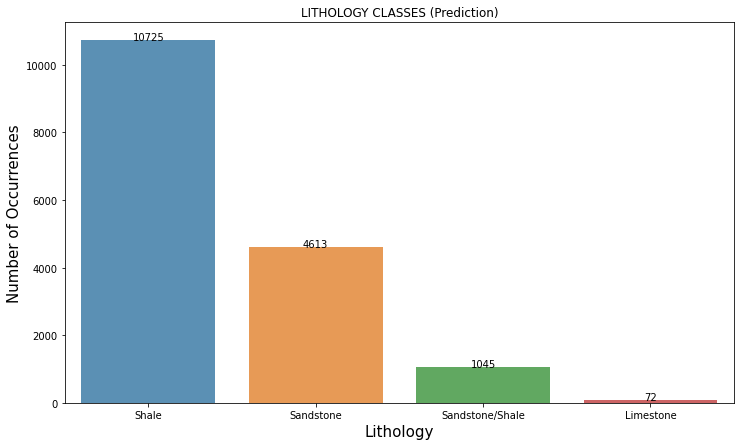

In [100]:
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=predicted_label, y=predicted.values, alpha=0.8).set(xlabel='Lithology', ylabel='Number of Occurrences',title='LITHOLOGY CLASSES (Prediction)')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10, predicted.values[i],ha="center")
plt.show()

<h2 id="lstm">LSTM</h2>

In [101]:
_ , X_train_lstm, X_val_lstm ,X_test_lstm = input_prep(X_train, X_val, X_test, lstm = True)

for x in [X_train_lstm, y_train_enc, X_val_lstm, y_val_enc, X_test_lstm, y_test_enc]:
  print(x.shape)

(143832, 1, 12)
(143832, 8)
(32781, 1, 12)
(32781, 8)
(16455, 1, 12)
(16455, 8)


In [102]:
def lstm_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128,
               input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),
               dropout=0.3, recurrent_dropout=0.3,return_sequences = True))
    model.add(tf.keras.layers.LSTM(units=64,
               dropout=0.3, recurrent_dropout=0.3))
    model.add(tf.keras.layers.Dense(y_train_enc.shape[1], activation = 'softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [103]:
lstm_model = lstm_model()
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            72192     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
Total params: 122,120
Trainable params: 122,120
Non-trainable params: 0
_________________________________________________________________


In [104]:
lstm_history = lstm_model.fit(X_train_lstm, y_train_enc,
                    validation_data= (X_val_lstm,y_val_enc),
                    batch_size=256,
                    epochs=500,
                    steps_per_epoch=10,
                    verbose=2)

Epoch 1/500
10/10 - 11s - loss: 2.0594 - accuracy: 0.4074 - val_loss: 2.0301 - val_accuracy: 0.5513
Epoch 2/500
10/10 - 1s - loss: 2.0115 - accuracy: 0.5590 - val_loss: 1.9793 - val_accuracy: 0.6184
Epoch 3/500
10/10 - 1s - loss: 1.9433 - accuracy: 0.5703 - val_loss: 1.8926 - val_accuracy: 0.6764
Epoch 4/500
10/10 - 1s - loss: 1.8324 - accuracy: 0.6066 - val_loss: 1.7720 - val_accuracy: 0.6804
Epoch 5/500
10/10 - 1s - loss: 1.6501 - accuracy: 0.6137 - val_loss: 1.6090 - val_accuracy: 0.6824
Epoch 6/500
10/10 - 1s - loss: 1.4712 - accuracy: 0.5992 - val_loss: 1.4055 - val_accuracy: 0.6848
Epoch 7/500
10/10 - 1s - loss: 1.3042 - accuracy: 0.6113 - val_loss: 1.2859 - val_accuracy: 0.6860
Epoch 8/500
10/10 - 1s - loss: 1.2123 - accuracy: 0.6215 - val_loss: 1.2842 - val_accuracy: 0.6865
Epoch 9/500
10/10 - 1s - loss: 1.1516 - accuracy: 0.6227 - val_loss: 1.2979 - val_accuracy: 0.6911
Epoch 10/500
10/10 - 1s - loss: 1.0843 - accuracy: 0.6336 - val_loss: 1.2900 - val_accuracy: 0.6980
Epoch 11

10/10 - 1s - loss: 0.7480 - accuracy: 0.7453 - val_loss: 1.0571 - val_accuracy: 0.6953
Epoch 84/500
10/10 - 1s - loss: 0.7828 - accuracy: 0.7320 - val_loss: 1.0896 - val_accuracy: 0.6780
Epoch 85/500
10/10 - 1s - loss: 0.7806 - accuracy: 0.7215 - val_loss: 1.1294 - val_accuracy: 0.6528
Epoch 86/500
10/10 - 1s - loss: 0.7690 - accuracy: 0.7301 - val_loss: 1.1248 - val_accuracy: 0.6621
Epoch 87/500
10/10 - 1s - loss: 0.7330 - accuracy: 0.7504 - val_loss: 1.1026 - val_accuracy: 0.6672
Epoch 88/500
10/10 - 1s - loss: 0.7363 - accuracy: 0.7320 - val_loss: 1.0886 - val_accuracy: 0.6697
Epoch 89/500
10/10 - 1s - loss: 0.7898 - accuracy: 0.7219 - val_loss: 1.0959 - val_accuracy: 0.6704
Epoch 90/500
10/10 - 1s - loss: 0.7748 - accuracy: 0.7305 - val_loss: 1.1142 - val_accuracy: 0.6545
Epoch 91/500
10/10 - 1s - loss: 0.7416 - accuracy: 0.7414 - val_loss: 1.1009 - val_accuracy: 0.6640
Epoch 92/500
10/10 - 1s - loss: 0.7631 - accuracy: 0.7437 - val_loss: 1.0847 - val_accuracy: 0.6714
Epoch 93/500


Epoch 165/500
10/10 - 1s - loss: 0.7294 - accuracy: 0.7457 - val_loss: 1.1170 - val_accuracy: 0.6056
Epoch 166/500
10/10 - 1s - loss: 0.7004 - accuracy: 0.7531 - val_loss: 1.0999 - val_accuracy: 0.6263
Epoch 167/500
10/10 - 1s - loss: 0.7061 - accuracy: 0.7574 - val_loss: 1.0970 - val_accuracy: 0.6309
Epoch 168/500
10/10 - 1s - loss: 0.7365 - accuracy: 0.7434 - val_loss: 1.1156 - val_accuracy: 0.6270
Epoch 169/500
10/10 - 1s - loss: 0.7095 - accuracy: 0.7492 - val_loss: 1.1003 - val_accuracy: 0.6379
Epoch 170/500
10/10 - 1s - loss: 0.6997 - accuracy: 0.7625 - val_loss: 1.0804 - val_accuracy: 0.6441
Epoch 171/500
10/10 - 1s - loss: 0.6734 - accuracy: 0.7586 - val_loss: 1.0903 - val_accuracy: 0.6391
Epoch 172/500
10/10 - 1s - loss: 0.6776 - accuracy: 0.7637 - val_loss: 1.1006 - val_accuracy: 0.6292
Epoch 173/500
10/10 - 1s - loss: 0.6524 - accuracy: 0.7703 - val_loss: 1.0950 - val_accuracy: 0.6379
Epoch 174/500
10/10 - 1s - loss: 0.6867 - accuracy: 0.7641 - val_loss: 1.0769 - val_accurac

10/10 - 1s - loss: 0.6815 - accuracy: 0.7633 - val_loss: 1.2848 - val_accuracy: 0.5301
Epoch 247/500
10/10 - 1s - loss: 0.6622 - accuracy: 0.7645 - val_loss: 1.2562 - val_accuracy: 0.5371
Epoch 248/500
10/10 - 1s - loss: 0.6481 - accuracy: 0.7707 - val_loss: 1.2135 - val_accuracy: 0.5544
Epoch 249/500
10/10 - 1s - loss: 0.6564 - accuracy: 0.7734 - val_loss: 1.2285 - val_accuracy: 0.5456
Epoch 250/500
10/10 - 1s - loss: 0.6675 - accuracy: 0.7703 - val_loss: 1.2207 - val_accuracy: 0.5496
Epoch 251/500
10/10 - 1s - loss: 0.6434 - accuracy: 0.7730 - val_loss: 1.2041 - val_accuracy: 0.5608
Epoch 252/500
10/10 - 1s - loss: 0.6679 - accuracy: 0.7762 - val_loss: 1.1912 - val_accuracy: 0.5637
Epoch 253/500
10/10 - 1s - loss: 0.6640 - accuracy: 0.7691 - val_loss: 1.1979 - val_accuracy: 0.5484
Epoch 254/500
10/10 - 1s - loss: 0.6999 - accuracy: 0.7590 - val_loss: 1.1772 - val_accuracy: 0.5583
Epoch 255/500
10/10 - 1s - loss: 0.6791 - accuracy: 0.7656 - val_loss: 1.1608 - val_accuracy: 0.5668
Epoc

Epoch 328/500
10/10 - 1s - loss: 0.6473 - accuracy: 0.7828 - val_loss: 1.2365 - val_accuracy: 0.5381
Epoch 329/500
10/10 - 1s - loss: 0.6580 - accuracy: 0.7828 - val_loss: 1.2256 - val_accuracy: 0.5439
Epoch 330/500
10/10 - 1s - loss: 0.6250 - accuracy: 0.7801 - val_loss: 1.2186 - val_accuracy: 0.5475
Epoch 331/500
10/10 - 1s - loss: 0.6432 - accuracy: 0.7746 - val_loss: 1.2435 - val_accuracy: 0.5359
Epoch 332/500
10/10 - 1s - loss: 0.6326 - accuracy: 0.7883 - val_loss: 1.2596 - val_accuracy: 0.5368
Epoch 333/500
10/10 - 1s - loss: 0.6153 - accuracy: 0.7855 - val_loss: 1.2585 - val_accuracy: 0.5431
Epoch 334/500
10/10 - 1s - loss: 0.6569 - accuracy: 0.7719 - val_loss: 1.2716 - val_accuracy: 0.5346
Epoch 335/500
10/10 - 1s - loss: 0.5925 - accuracy: 0.7957 - val_loss: 1.2585 - val_accuracy: 0.5430
Epoch 336/500
10/10 - 1s - loss: 0.6710 - accuracy: 0.7664 - val_loss: 1.2351 - val_accuracy: 0.5527
Epoch 337/500
10/10 - 1s - loss: 0.6299 - accuracy: 0.7770 - val_loss: 1.2244 - val_accurac

10/10 - 1s - loss: 0.6060 - accuracy: 0.7793 - val_loss: 1.3125 - val_accuracy: 0.5370
Epoch 410/500
10/10 - 1s - loss: 0.6047 - accuracy: 0.7832 - val_loss: 1.3296 - val_accuracy: 0.5309
Epoch 411/500
10/10 - 1s - loss: 0.6337 - accuracy: 0.7809 - val_loss: 1.3399 - val_accuracy: 0.5215
Epoch 412/500
10/10 - 1s - loss: 0.5806 - accuracy: 0.8000 - val_loss: 1.2964 - val_accuracy: 0.5363
Epoch 413/500
10/10 - 1s - loss: 0.6044 - accuracy: 0.7902 - val_loss: 1.2802 - val_accuracy: 0.5404
Epoch 414/500
10/10 - 1s - loss: 0.6279 - accuracy: 0.7836 - val_loss: 1.2917 - val_accuracy: 0.5348
Epoch 415/500
10/10 - 1s - loss: 0.5970 - accuracy: 0.7895 - val_loss: 1.2757 - val_accuracy: 0.5403
Epoch 416/500
10/10 - 1s - loss: 0.6277 - accuracy: 0.7832 - val_loss: 1.2545 - val_accuracy: 0.5537
Epoch 417/500
10/10 - 1s - loss: 0.6270 - accuracy: 0.7832 - val_loss: 1.2602 - val_accuracy: 0.5561
Epoch 418/500
10/10 - 1s - loss: 0.6099 - accuracy: 0.7812 - val_loss: 1.3034 - val_accuracy: 0.5346
Epoc

Epoch 491/500
10/10 - 1s - loss: 0.5911 - accuracy: 0.7918 - val_loss: 1.3592 - val_accuracy: 0.5286
Epoch 492/500
10/10 - 1s - loss: 0.5878 - accuracy: 0.7887 - val_loss: 1.3504 - val_accuracy: 0.5314
Epoch 493/500
10/10 - 1s - loss: 0.5825 - accuracy: 0.7949 - val_loss: 1.3620 - val_accuracy: 0.5274
Epoch 494/500
10/10 - 1s - loss: 0.6009 - accuracy: 0.7902 - val_loss: 1.3557 - val_accuracy: 0.5277
Epoch 495/500
10/10 - 1s - loss: 0.5862 - accuracy: 0.7922 - val_loss: 1.3266 - val_accuracy: 0.5366
Epoch 496/500
10/10 - 1s - loss: 0.5782 - accuracy: 0.7988 - val_loss: 1.3253 - val_accuracy: 0.5352
Epoch 497/500
10/10 - 1s - loss: 0.6178 - accuracy: 0.7746 - val_loss: 1.3391 - val_accuracy: 0.5349
Epoch 498/500
10/10 - 1s - loss: 0.5933 - accuracy: 0.8004 - val_loss: 1.3434 - val_accuracy: 0.5369
Epoch 499/500
10/10 - 1s - loss: 0.6048 - accuracy: 0.7926 - val_loss: 1.3525 - val_accuracy: 0.5381
Epoch 500/500
10/10 - 1s - loss: 0.5627 - accuracy: 0.8109 - val_loss: 1.3621 - val_accurac

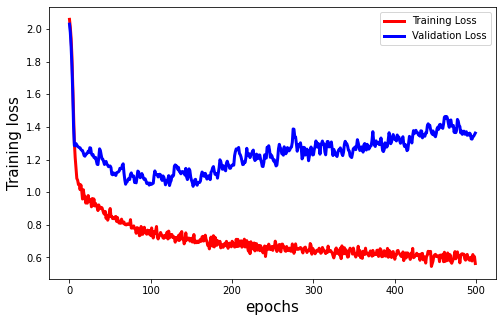

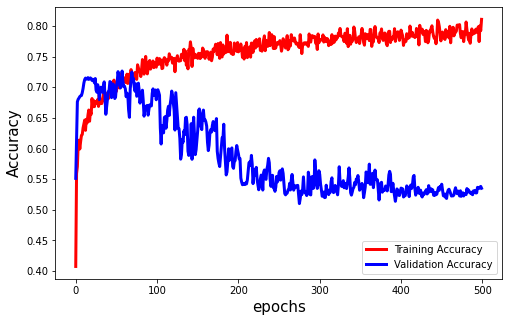

In [105]:
loss_accuracy(lstm_history)

In [106]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = lstm_model.evaluate(X_test_lstm, y_test_enc)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = lstm_model.predict(X_test_lstm[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
515/515 [==============================] - 1s 2ms/step - loss: 0.8920 - accuracy: 0.7559
test loss, test acc: [0.8919505476951599, 0.7559404373168945]
Generate predictions for 10 samples
predictions shape: (10, 8)


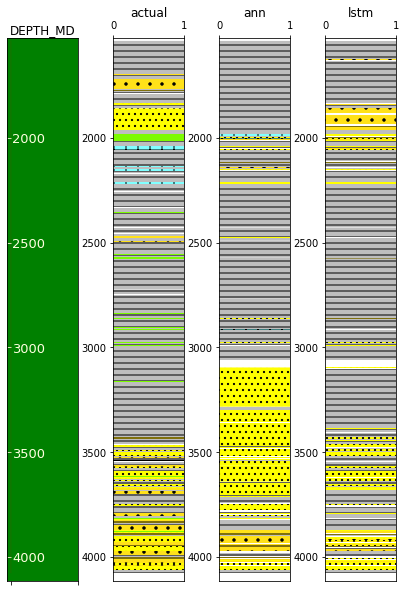

In [107]:
y_lstm = label_encoder.inverse_transform(lstm_model.predict(X_test_lstm)).squeeze()
predicted_data['lstm'] = [rev_lith_num[k] for k in y_lstm]
predict_plot(predicted_data)

              precision    recall  f1-score   support

       30000       0.49      0.47      0.48      2183
       65000       0.88      0.97      0.92     11595
       65030       0.13      0.13      0.13      1655
       70000       0.00      0.00      0.00       273
       80000       0.00      0.00      0.00       663
       90000       0.00      0.00      0.00        86

    accuracy                           0.76     16455
   macro avg       0.25      0.26      0.25     16455
weighted avg       0.70      0.76      0.72     16455

Confusion matrix, without normalization
[[ 1032   130  1021     0     0     0]
 [  262 11200   130     3     0     0]
 [  421  1027   207     0     0     0]
 [  174    47    52     0     0     0]
 [  195   300   161     7     0     0]
 [   38    48     0     0     0     0]]


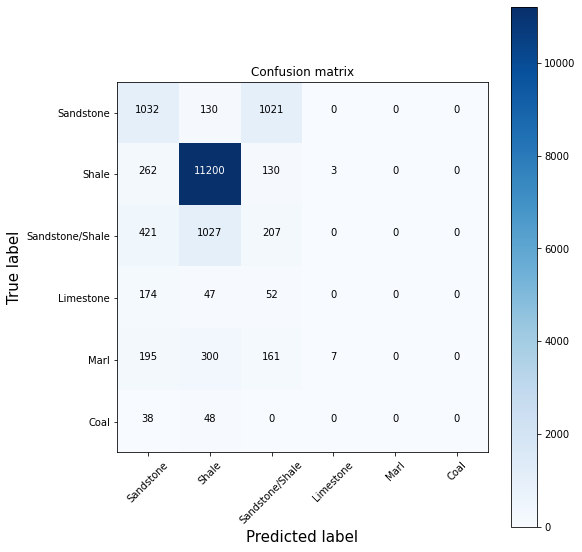

In [108]:
cnf_matrix = confusion_matrix(predicted_data["actual"],predicted_data["lstm"], labels=test_list)
print (classification_report(predicted_data["actual"],predicted_data["lstm"]))

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_label,normalize= False,  title='Confusion matrix')

<h2 id="imbalance">Imbalance Class</h2>
Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class
ty class.

In [109]:
y_train_labels = np.argmax(y_train_enc, axis =1)
y_train_labels
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(y_train_labels),
                                                 y =np.squeeze(y_train_labels))
class_weight = {i : class_weight[i] for i in range(len(class_weight))}
class_weight

{0: 0.7350067454315032,
 1: 0.9222837796244998,
 2: 0.2084449236548294,
 3: 5.65377358490566,
 4: 115.25,
 5: 3.7922379244885045,
 6: 3.5294464075382805,
 7: 39.688741721854306}

In [110]:
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_resample(X_train_norm, y_train_enc)
X_sm_val, y_sm_val = smote.fit_resample(X_val_norm, y_val_enc)
print(X_sm.shape, y_sm.shape)
print(X_sm_val.shape, y_sm_val.shape)

(229929, 12) (229929, 8)
(55333, 12) (55333, 8)


In [111]:
def make_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, activation = 'relu', input_dim = X_train_norm.shape[1]))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(y_sm.shape[1], activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [112]:
weighted_model = make_model()
weighted_model.summary()
weighted_history = weighted_model.fit(X_train_norm, y_train_enc,
                    validation_data= (X_val_norm,y_val_enc),
                    class_weight=class_weight,
                    batch_size=256,
                    epochs=500,
                    steps_per_epoch=10,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)],
                    verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               3328      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

Epoch 68/500
10/10 - 0s - loss: 1.4262 - accuracy: 0.2824 - val_loss: 2.1288 - val_accuracy: 0.1685
Epoch 69/500
10/10 - 0s - loss: 1.4038 - accuracy: 0.2707 - val_loss: 1.9379 - val_accuracy: 0.1675
Epoch 70/500
10/10 - 0s - loss: 1.2140 - accuracy: 0.3141 - val_loss: 1.8905 - val_accuracy: 0.1577
Epoch 71/500
10/10 - 0s - loss: 1.2636 - accuracy: 0.3469 - val_loss: 1.9506 - val_accuracy: 0.1724
Epoch 72/500
10/10 - 0s - loss: 1.3378 - accuracy: 0.3398 - val_loss: 1.9767 - val_accuracy: 0.1621
Epoch 73/500
10/10 - 0s - loss: 1.3384 - accuracy: 0.3328 - val_loss: 1.8849 - val_accuracy: 0.1757
Epoch 74/500
10/10 - 0s - loss: 1.3443 - accuracy: 0.3219 - val_loss: 1.9084 - val_accuracy: 0.1567
Epoch 75/500
10/10 - 0s - loss: 1.2888 - accuracy: 0.3359 - val_loss: 2.0478 - val_accuracy: 0.1337
Epoch 76/500
10/10 - 0s - loss: 1.4012 - accuracy: 0.3309 - val_loss: 1.9985 - val_accuracy: 0.1357
Epoch 77/500
10/10 - 0s - loss: 1.3164 - accuracy: 0.3332 - val_loss: 1.8944 - val_accuracy: 0.1521


Epoch 150/500
10/10 - 0s - loss: 1.0147 - accuracy: 0.4113 - val_loss: 1.7545 - val_accuracy: 0.2683
Epoch 151/500
10/10 - 0s - loss: 1.2099 - accuracy: 0.4043 - val_loss: 1.7808 - val_accuracy: 0.2515
Epoch 152/500
10/10 - 0s - loss: 0.9638 - accuracy: 0.4031 - val_loss: 1.8041 - val_accuracy: 0.2467
Epoch 153/500
10/10 - 0s - loss: 1.3590 - accuracy: 0.3770 - val_loss: 1.8042 - val_accuracy: 0.2486
Epoch 154/500
10/10 - 0s - loss: 1.4417 - accuracy: 0.4199 - val_loss: 1.8970 - val_accuracy: 0.2665
Epoch 155/500
10/10 - 0s - loss: 1.1640 - accuracy: 0.3812 - val_loss: 2.0887 - val_accuracy: 0.2486
Epoch 156/500
10/10 - 0s - loss: 1.1776 - accuracy: 0.3727 - val_loss: 2.0363 - val_accuracy: 0.2354
Epoch 157/500
10/10 - 0s - loss: 1.1377 - accuracy: 0.3645 - val_loss: 1.8818 - val_accuracy: 0.2335
Epoch 158/500
10/10 - 0s - loss: 1.2577 - accuracy: 0.3984 - val_loss: 1.8595 - val_accuracy: 0.2493
Epoch 159/500
10/10 - 0s - loss: 1.2789 - accuracy: 0.3926 - val_loss: 1.7972 - val_accurac

10/10 - 0s - loss: 0.9782 - accuracy: 0.4648 - val_loss: 1.8808 - val_accuracy: 0.3109
Epoch 232/500
10/10 - 0s - loss: 1.2293 - accuracy: 0.4504 - val_loss: 1.8824 - val_accuracy: 0.2945
Epoch 233/500
10/10 - 0s - loss: 1.0373 - accuracy: 0.4500 - val_loss: 1.8860 - val_accuracy: 0.2961
Epoch 234/500
10/10 - 0s - loss: 0.8734 - accuracy: 0.4207 - val_loss: 1.8785 - val_accuracy: 0.2970
Epoch 235/500
10/10 - 0s - loss: 1.0562 - accuracy: 0.4555 - val_loss: 1.8871 - val_accuracy: 0.2979
Epoch 236/500
10/10 - 0s - loss: 1.0034 - accuracy: 0.4563 - val_loss: 1.9169 - val_accuracy: 0.2867
Epoch 237/500
10/10 - 0s - loss: 0.9214 - accuracy: 0.4605 - val_loss: 1.8938 - val_accuracy: 0.2810
Epoch 238/500
10/10 - 0s - loss: 1.0741 - accuracy: 0.4402 - val_loss: 1.8825 - val_accuracy: 0.2739
Epoch 239/500
10/10 - 0s - loss: 0.8773 - accuracy: 0.4629 - val_loss: 1.8879 - val_accuracy: 0.2709
Epoch 240/500
10/10 - 0s - loss: 1.0748 - accuracy: 0.4594 - val_loss: 1.9021 - val_accuracy: 0.2746
Epoc

Epoch 313/500
10/10 - 0s - loss: 0.8401 - accuracy: 0.4824 - val_loss: 1.9442 - val_accuracy: 0.3171
Epoch 314/500
10/10 - 0s - loss: 1.0844 - accuracy: 0.5094 - val_loss: 2.1136 - val_accuracy: 0.2950
Epoch 315/500
10/10 - 0s - loss: 0.9269 - accuracy: 0.5004 - val_loss: 2.4001 - val_accuracy: 0.2249
Epoch 316/500
10/10 - 0s - loss: 1.0806 - accuracy: 0.4711 - val_loss: 2.2757 - val_accuracy: 0.2361
Epoch 317/500
10/10 - 0s - loss: 0.9723 - accuracy: 0.4699 - val_loss: 2.0368 - val_accuracy: 0.2919
Epoch 318/500
10/10 - 0s - loss: 0.8566 - accuracy: 0.4910 - val_loss: 2.0395 - val_accuracy: 0.3143
Epoch 319/500
10/10 - 0s - loss: 0.8695 - accuracy: 0.5098 - val_loss: 1.9654 - val_accuracy: 0.3378
Epoch 320/500
10/10 - 0s - loss: 0.9559 - accuracy: 0.5082 - val_loss: 1.8979 - val_accuracy: 0.3646
Epoch 321/500
10/10 - 0s - loss: 1.1636 - accuracy: 0.5016 - val_loss: 2.1037 - val_accuracy: 0.3381
Epoch 322/500
10/10 - 0s - loss: 1.0127 - accuracy: 0.4727 - val_loss: 2.2661 - val_accurac

10/10 - 0s - loss: 0.8377 - accuracy: 0.5516 - val_loss: 1.6001 - val_accuracy: 0.3811
Epoch 395/500
10/10 - 0s - loss: 0.8893 - accuracy: 0.5395 - val_loss: 1.5706 - val_accuracy: 0.3755
Epoch 396/500
10/10 - 0s - loss: 0.8722 - accuracy: 0.5359 - val_loss: 1.5507 - val_accuracy: 0.3742
Epoch 397/500
10/10 - 0s - loss: 0.9906 - accuracy: 0.5281 - val_loss: 1.6880 - val_accuracy: 0.3663
Epoch 398/500
10/10 - 0s - loss: 0.8837 - accuracy: 0.5121 - val_loss: 1.8057 - val_accuracy: 0.3639
Epoch 399/500
10/10 - 0s - loss: 0.8870 - accuracy: 0.5211 - val_loss: 1.8138 - val_accuracy: 0.3889
Epoch 400/500
10/10 - 0s - loss: 0.9080 - accuracy: 0.5125 - val_loss: 1.7416 - val_accuracy: 0.4303
Epoch 401/500
10/10 - 0s - loss: 0.8389 - accuracy: 0.5332 - val_loss: 1.7541 - val_accuracy: 0.4372
Epoch 402/500
10/10 - 0s - loss: 1.0755 - accuracy: 0.5375 - val_loss: 1.7727 - val_accuracy: 0.4598
Epoch 403/500
10/10 - 0s - loss: 0.9144 - accuracy: 0.5477 - val_loss: 1.7683 - val_accuracy: 0.4560
Epoc

Epoch 476/500
10/10 - 0s - loss: 0.9265 - accuracy: 0.5465 - val_loss: 1.8492 - val_accuracy: 0.4126
Epoch 477/500
10/10 - 0s - loss: 0.8280 - accuracy: 0.5344 - val_loss: 1.8237 - val_accuracy: 0.3730
Epoch 478/500
10/10 - 0s - loss: 0.7809 - accuracy: 0.5457 - val_loss: 1.7627 - val_accuracy: 0.3649
Epoch 479/500
10/10 - 0s - loss: 0.7179 - accuracy: 0.5656 - val_loss: 1.6653 - val_accuracy: 0.4051
Epoch 480/500
10/10 - 0s - loss: 0.8016 - accuracy: 0.5867 - val_loss: 1.6091 - val_accuracy: 0.4278
Epoch 481/500
10/10 - 0s - loss: 0.9387 - accuracy: 0.5840 - val_loss: 1.6392 - val_accuracy: 0.4363
Epoch 482/500
10/10 - 0s - loss: 0.7728 - accuracy: 0.5629 - val_loss: 1.6261 - val_accuracy: 0.4471
Epoch 483/500
10/10 - 0s - loss: 0.8253 - accuracy: 0.5863 - val_loss: 1.6690 - val_accuracy: 0.4364
Epoch 484/500
10/10 - 0s - loss: 0.9496 - accuracy: 0.5855 - val_loss: 1.7130 - val_accuracy: 0.4227
Epoch 485/500
10/10 - 0s - loss: 0.7906 - accuracy: 0.5766 - val_loss: 1.6634 - val_accurac

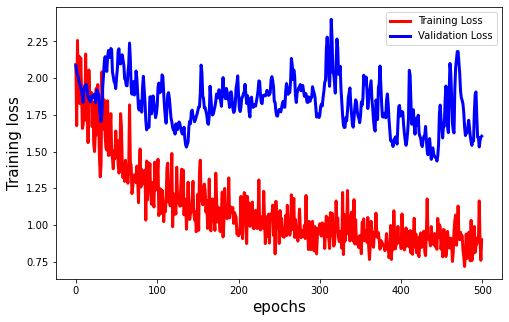

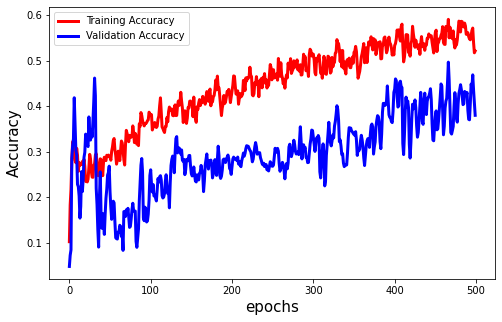

In [113]:
loss_accuracy(weighted_history)

In [114]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = weighted_model.evaluate(X_test_norm, y_test_enc)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = weighted_model.predict(X_test_norm[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
515/515 [==============================] - 1s 1ms/step - loss: 2.4328 - accuracy: 0.4696
test loss, test acc: [2.432798385620117, 0.4695837199687958]
Generate predictions for 10 samples
predictions shape: (10, 8)


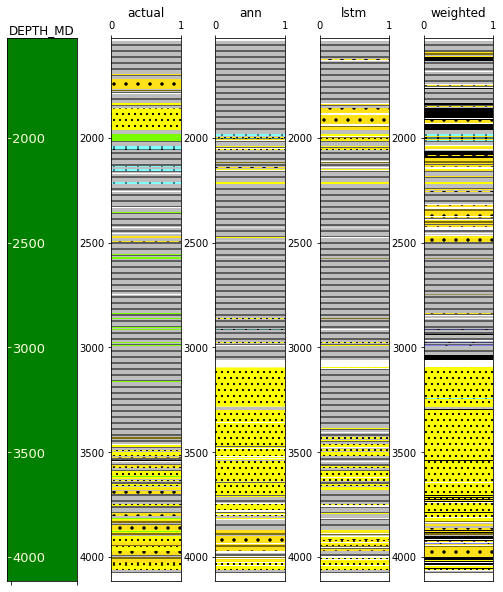

In [115]:
y_weighted = label_encoder.inverse_transform(weighted_model.predict(X_test_norm)).squeeze()
predicted_data['weighted'] = [rev_lith_num[k] for k in y_weighted]
predict_plot(predicted_data)

              precision    recall  f1-score   support

       30000       0.18      0.39      0.25      2183
       65000       0.93      0.55      0.69     11595
       65030       0.19      0.31      0.23      1655
       70000       0.14      0.07      0.09       273
       74000       0.00      0.00      0.00         0
       80000       0.00      0.00      0.00       663
       90000       0.01      0.15      0.01        86

    accuracy                           0.47     16455
   macro avg       0.21      0.21      0.18     16455
weighted avg       0.70      0.47      0.54     16455

Confusion matrix, without normalization
[[ 861    6  429    0    0  882]
 [3054 6326 1445    7    0  762]
 [ 507  360  509    4    0  257]
 [ 148   13   82   18    0   12]
 [ 156  112  236  104    0   33]
 [  64    9    0    0    0   13]]


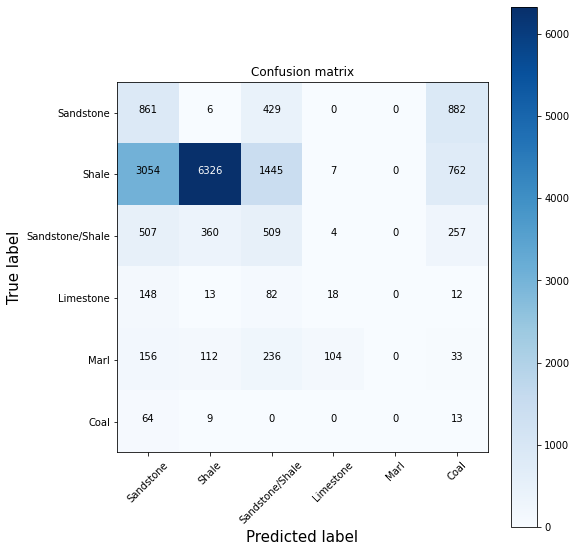

In [116]:
cnf_matrix = confusion_matrix(predicted_data["actual"],predicted_data["weighted"], labels=test_list)
print (classification_report(predicted_data["actual"],predicted_data["weighted"]))

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_label,normalize= False,  title='Confusion matrix')

<h2 id="hypertuning">Parameter and Hyperparameter Tuning</h2>
Deep Learning model performance depends upon its architecture and configuration set by the user. The biggest challenge is to find the optimal configuration for training the model. We can say model configuration as a collection of hyperparameters. In Deep Neural Networks these hyperparameters are number of neurons in the hidden layers, total number of layers, type of activation function and its learning rate which defines the quality and speed of both training and vlidation process. Hyperparametr tuning is done to select the optimal parameter. Although, this process is time and computational power consuming, yet this enable the model to work and predict on new dataset with high potential capacity.


In [117]:
def base_model(hp):
    model = tf.keras.Sequential()
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    
    model.add(tf.keras.layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation = 'relu', input_dim = X_train_norm.shape[1]))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)))
    model.add(tf.keras.layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation = 'relu'))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)))
    model.add(tf.keras.layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation = 'relu'))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)))
    model.add(tf.keras.layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation = 'relu'))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)))
    model.add(tf.keras.layers.Dense(y_train_enc.shape[1], activation = 'softmax'))
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [118]:
tuner = kt.Hyperband(
    base_model,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [119]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [120]:
tuner.search(X_train_norm, y_train_enc, epochs=30, validation_data= (X_val_norm,y_val_enc), callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [121]:
best_model = tuner.get_best_models(num_models=1)

In [122]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 320 and the optimal learning rate for the optimizer
is 0.01.



In [123]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 320)               4160      
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               102720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 320)               102720    
_________________________________________________________________
dropout_2 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 320)               1

In [124]:
hist_best = hypermodel.fit(X_train_norm, y_train_enc,
                           epochs=500,
                           validation_data= (X_val_norm,y_val_enc),
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)],
                           verbose=2)

Epoch 1/500
4495/4495 - 38s - loss: 1.0983 - accuracy: 0.6949 - val_loss: 1.0141 - val_accuracy: 0.7178
Epoch 2/500
4495/4495 - 34s - loss: 1.0916 - accuracy: 0.6931 - val_loss: 0.9284 - val_accuracy: 0.7402
Epoch 3/500
4495/4495 - 34s - loss: 1.1029 - accuracy: 0.6847 - val_loss: 1.0557 - val_accuracy: 0.6966
Epoch 4/500
4495/4495 - 33s - loss: 1.2088 - accuracy: 0.6864 - val_loss: 1.0038 - val_accuracy: 0.7239
Epoch 5/500
4495/4495 - 34s - loss: 1.1043 - accuracy: 0.6870 - val_loss: 0.9604 - val_accuracy: 0.7448
Epoch 6/500
4495/4495 - 34s - loss: 1.0826 - accuracy: 0.6889 - val_loss: 0.9653 - val_accuracy: 0.7537
Epoch 7/500
4495/4495 - 34s - loss: 1.1314 - accuracy: 0.6873 - val_loss: 0.9319 - val_accuracy: 0.7563
Epoch 8/500
4495/4495 - 34s - loss: 1.1608 - accuracy: 0.6850 - val_loss: 0.9990 - val_accuracy: 0.7268
Epoch 9/500
4495/4495 - 34s - loss: 1.0657 - accuracy: 0.6888 - val_loss: 1.0016 - val_accuracy: 0.7291
Epoch 10/500
4495/4495 - 34s - loss: 1.0888 - accuracy: 0.6839 -

4495/4495 - 34s - loss: 1.0666 - accuracy: 0.6701 - val_loss: 0.9038 - val_accuracy: 0.7795
Epoch 80/500
4495/4495 - 34s - loss: 1.0518 - accuracy: 0.6687 - val_loss: 0.8996 - val_accuracy: 0.7775
Epoch 81/500
4495/4495 - 35s - loss: 1.0673 - accuracy: 0.6768 - val_loss: 0.9212 - val_accuracy: 0.7656
Epoch 82/500
4495/4495 - 34s - loss: 1.0581 - accuracy: 0.6677 - val_loss: 0.9777 - val_accuracy: 0.7447
Epoch 83/500
4495/4495 - 34s - loss: 1.0509 - accuracy: 0.6654 - val_loss: 0.9311 - val_accuracy: 0.7726
Epoch 84/500
4495/4495 - 34s - loss: 1.0489 - accuracy: 0.6681 - val_loss: 0.9744 - val_accuracy: 0.7419
Epoch 85/500
4495/4495 - 33s - loss: 1.0530 - accuracy: 0.6693 - val_loss: 0.9222 - val_accuracy: 0.7747
Epoch 86/500
4495/4495 - 34s - loss: 1.0591 - accuracy: 0.6748 - val_loss: 0.9406 - val_accuracy: 0.7628
Epoch 87/500
4495/4495 - 38s - loss: 1.0571 - accuracy: 0.6725 - val_loss: 0.9101 - val_accuracy: 0.7834
Epoch 88/500
4495/4495 - 34s - loss: 1.0552 - accuracy: 0.6715 - val

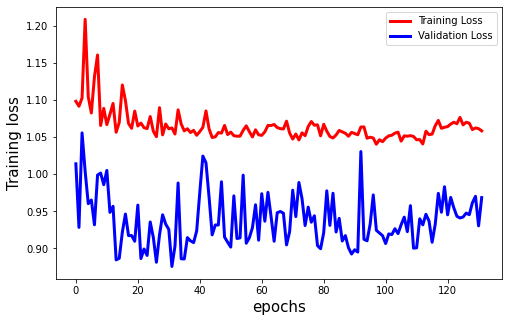

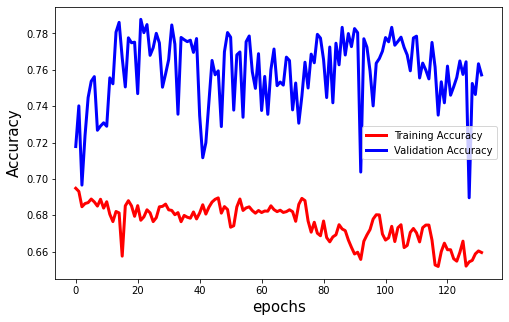

In [125]:
loss_accuracy(hist_best)

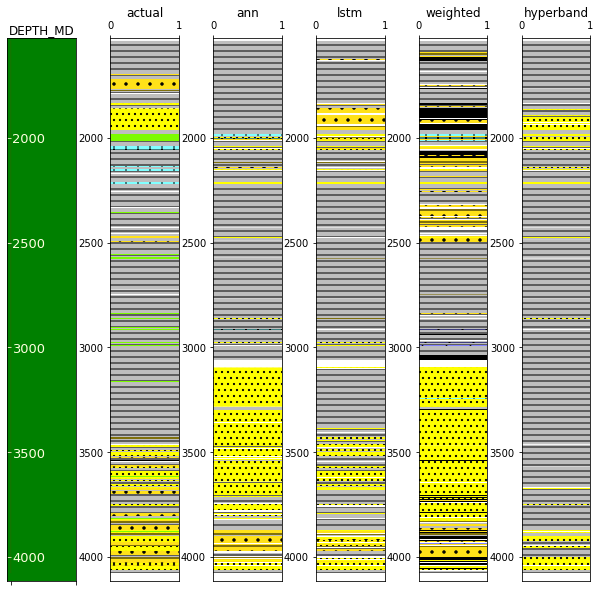

In [126]:
y_pred_best = label_encoder.inverse_transform(hypermodel.predict(X_test_norm)).squeeze()
predicted_data['hyperband'] = [rev_lith_num[k] for k in y_pred_best]
predict_plot(predicted_data)

              precision    recall  f1-score   support

       30000       0.54      0.42      0.47      2183
       65000       0.78      1.00      0.88     11595
       65030       0.00      0.00      0.00      1655
       70000       0.00      0.00      0.00       273
       80000       0.00      0.00      0.00       663
       90000       0.00      0.00      0.00        86

    accuracy                           0.76     16455
   macro avg       0.22      0.24      0.22     16455
weighted avg       0.62      0.76      0.68     16455

Confusion matrix, without normalization
[[  920  1263     0     0     0     0]
 [   30 11565     0     0     0     0]
 [  307  1348     0     0     0     0]
 [  216    57     0     0     0     0]
 [  246   417     0     0     0     0]
 [    0    86     0     0     0     0]]


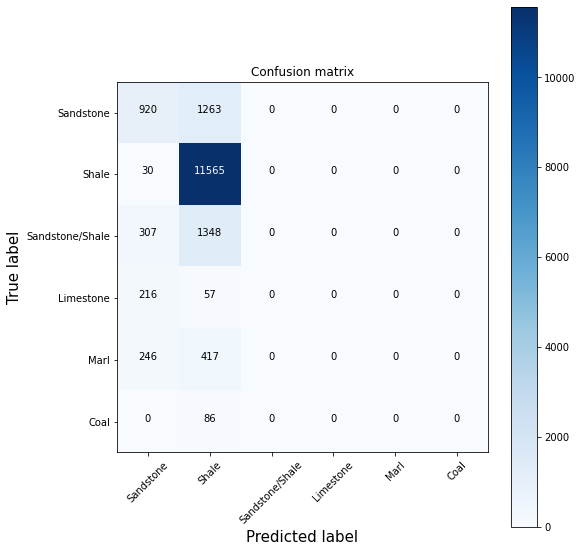

In [127]:
cnf_matrix = confusion_matrix(predicted_data["actual"],predicted_data["hyperband"], labels=test_list)
print (classification_report(predicted_data["actual"],predicted_data["hyperband"]))

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_label,normalize= False,  title='Confusion matrix')

In [128]:
hypermodel_weight = tuner.hypermodel.build(best_hps)

hist_best_weight = hypermodel_weight.fit(X_train_norm, y_train_enc,
                                         class_weight=class_weight,
                                         epochs=500,  validation_data= (X_val_norm,y_val_enc),
                                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)],
                                         verbose=1)

Epoch 1/500
4495/4495 [==============================] - 39s 8ms/step - loss: 3.5479 - accuracy: 0.1450 - val_loss: 2.1426 - val_accuracy: 0.0029
Epoch 2/500
4495/4495 [==============================] - 38s 9ms/step - loss: 2.1176 - accuracy: 0.0543 - val_loss: 2.1459 - val_accuracy: 0.0028
Epoch 3/500
4495/4495 [==============================] - 39s 9ms/step - loss: 2.0765 - accuracy: 0.0768 - val_loss: 2.0630 - val_accuracy: 0.0291
Epoch 4/500
4495/4495 [==============================] - 52s 12ms/step - loss: 2.1855 - accuracy: 0.0258 - val_loss: 2.0986 - val_accuracy: 0.0016
Epoch 5/500
4495/4495 [==============================] - 48s 11ms/step - loss: 2.1188 - accuracy: 0.0305 - val_loss: 2.1069 - val_accuracy: 0.0225
Epoch 6/500
4495/4495 [==============================] - 40s 9ms/step - loss: 2.0937 - accuracy: 0.0562 - val_loss: 2.0118 - val_accuracy: 0.0291
Epoch 7/500
4495/4495 [==============================] - 39s 9ms/step - loss: 2.1120 - accuracy: 0.0430 - val_loss: 2.0297

Epoch 57/500
4495/4495 [==============================] - 33s 7ms/step - loss: 2.1059 - accuracy: 0.0294 - val_loss: 2.0938 - val_accuracy: 0.0016
Epoch 58/500
4495/4495 [==============================] - 33s 7ms/step - loss: 2.1287 - accuracy: 0.0330 - val_loss: 2.0899 - val_accuracy: 0.0225
Epoch 59/500
4495/4495 [==============================] - 33s 7ms/step - loss: 2.0393 - accuracy: 0.0919 - val_loss: 2.1458 - val_accuracy: 0.0028
Epoch 60/500
4495/4495 [==============================] - 33s 7ms/step - loss: 2.0922 - accuracy: 0.0741 - val_loss: 2.0594 - val_accuracy: 0.0225
Epoch 61/500
4495/4495 [==============================] - 33s 7ms/step - loss: 2.1057 - accuracy: 0.0437 - val_loss: 2.1125 - val_accuracy: 0.0217
Epoch 62/500
4495/4495 [==============================] - 33s 7ms/step - loss: 2.1199 - accuracy: 0.0391 - val_loss: 2.0836 - val_accuracy: 0.0225
Epoch 63/500
4495/4495 [==============================] - 33s 7ms/step - loss: 2.1102 - accuracy: 0.0226 - val_loss: 2

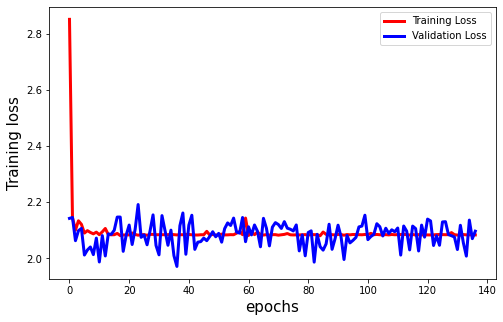

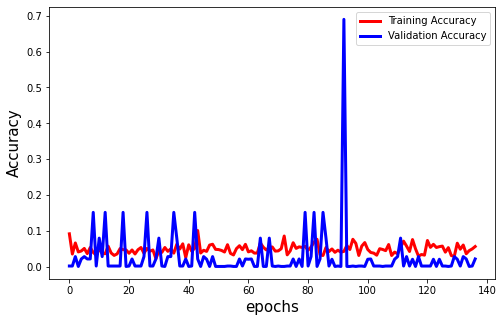

In [129]:
loss_accuracy(hist_best_weight)

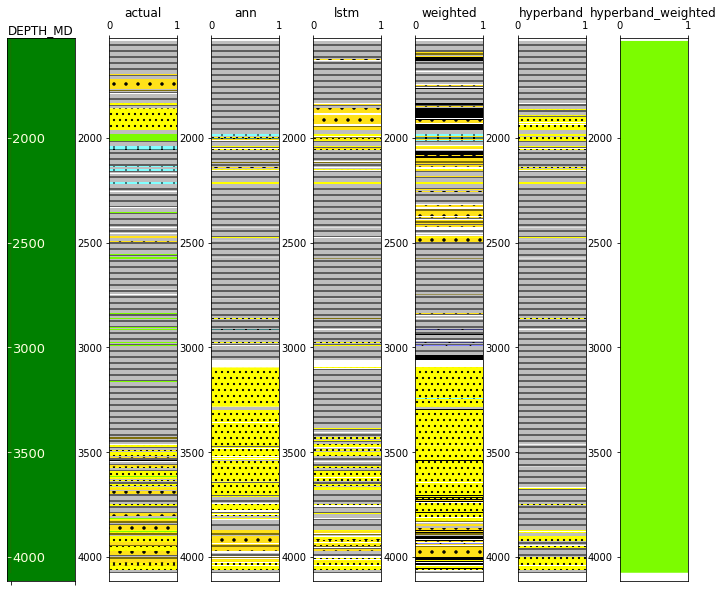

In [130]:
y_pred_best_weighted = label_encoder.inverse_transform(hypermodel_weight.predict(X_test_norm)).squeeze()
predicted_data['hyperband_weighted'] = [rev_lith_num[k] for k in y_pred_best_weighted]
predict_plot(predicted_data)

              precision    recall  f1-score   support

       30000       0.00      0.00      0.00      2183
       65000       0.00      0.00      0.00     11595
       65030       0.00      0.00      0.00      1655
       70000       0.00      0.00      0.00       273
       80000       0.04      1.00      0.08       663
       90000       0.00      0.00      0.00        86

    accuracy                           0.04     16455
   macro avg       0.01      0.17      0.01     16455
weighted avg       0.00      0.04      0.00     16455

Confusion matrix, without normalization
[[    0     0     0     0  2183     0]
 [    0     0     0     0 11595     0]
 [    0     0     0     0  1655     0]
 [    0     0     0     0   273     0]
 [    0     0     0     0   663     0]
 [    0     0     0     0    86     0]]


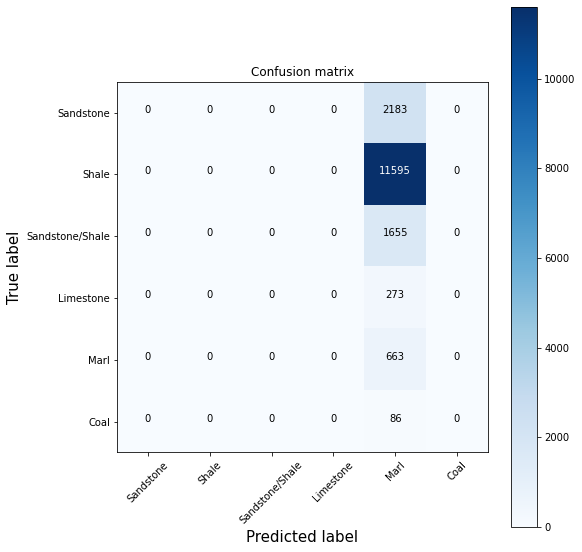

In [131]:
cnf_matrix = confusion_matrix(predicted_data["actual"],predicted_data["hyperband_weighted"], labels=test_list)
print (classification_report(predicted_data["actual"],predicted_data["hyperband_weighted"]))

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_label,normalize= False,  title='Confusion matrix')

# Save Model

In [132]:
model.save("base_model.h5")
lstm_model.save("lstm_model.h5")
hypermodel.save("hypermodel.h5")

In [133]:
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(label_encoder, open('label_encoder.pkl','wb'))

Let's wrap up all the thing

In [ ]:
class Model(object):
    def __init__(self, model_file, scaler_file):
        # Load pre-trained model from file
        self.model = tf.keras.models.load_model(model_file)
        # Load a "pre-trained" scaler from file
        self.scaler = pickle.load(open(scaler_file, 'rb'))
        
    def _preprocess(self, features):
        # Method to be run before inference. Contains things like
        # stripping unwanted columns, replacing NaNs, and scaling 
        # or normalizing data
        features.fillna(0, inplace=True)
        features = features[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP',
                             'RHOB', 'GR','NPHI', 'PEF','DTC', 'SP', 'DRHO']]
        return self.scaler.transform(features)
        
    def predict(self, features):
        # This function should be able to take in features in their
        # raw, unprocessed form as read from the file test.csv and
        # return predictions as an array integers of the same length
        X = self._preprocess(features)
        return self.model.predict(X)

In [ ]:
my_model = Model("hypermodel.h5","scaler.pkl")
my_model.model.summary()

The model can then be initialized using persisted data in the form of saved model file (or models files), scaler files, and other persisted data.  

# Conclusion and Recommendations
